# Import libraries

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import nltk

# import data

In [3]:
df = pd.read_csv('result_topic_modelling.csv')
df.head()

title  year  \
0             #FIFArabCup: Will Qatar score as host?  2021   
1               30 days to FIFA World Cup Qatar 2022  2022   
2  AI at World Cup 2022 to check crowds, control ...  2022   
3  African journalists slam UAE ‘manipulation’ ov...  2021   
4  Algerian FA files complaint over World Cup qua...  2022   

                                                text     source  \
0  on tuesday, november 30 at 19:30gmt:\r\nit’s e...  aljazeera   
1  in picturesdoha, qatar – fifa world cup qatar ...  aljazeera   
2  qatar has set up a tech hub that uses ai to ke...  aljazeera   
3  federation of african journalists condemns wha...  aljazeera   
4  algerian football federation demands fifa orde...  aljazeera   

                     most_likely_topic_name  most_likely_topic_number  
0                          host arab region                        19  
1                    winter summer schedule                        18  
2           security detain police activist                        12  
3                          host arab region                        19  
4  group group_stage knockout_stage playoff                        14

In [4]:
df['most_likely_topic_name'].unique()

array(['host arab region', 'winter summer schedule',
       'security detain police activist',
       'group group_stage knockout_stage playoff', 'stadium build host',
       'worker wage amnesty', 'day thing today', 'fan ticket match beer',
       'woman gay armband lgbtq', 'power sense sportswashing',
       'club season champions_league',
       'bribe investigation charge warner',
       'sport sponsorship investment', 'russia gouvernment ukraine',
       'blatter bid vote ethic_commitee', 'squad player coach',
       'goal score minute', 'statement organisation letter',
       'people technology var',
       'journalism issue_surround_qatar treatment'], dtype=object)

## All topic : guardian

In [5]:
import plotly.express as px

# Group by Year and most_likely_topic_name, then count occurrences
counts = df.groupby(['year', 'most_likely_topic_name', 'source']).size().reset_index(name='Count')
source = ['guardian']
counts = counts.loc[counts['source'].isin(source)]

# Define custom colors for each topic
custom_colors = {
    'host arab region': 'rgb(31, 119, 180)',  # Blue
    'winter summer schedule': 'rgb(255, 127, 14)',  # Orange
    'security detain police activist': 'rgb(44, 160, 44)',  # Green
    'group group_stage knockout_stage playoff': 'rgb(214, 39, 40)',  # Red
    'stadium build host': 'rgb(148, 103, 189)',  # Purple
    'worker wage amnesty': 'rgb(140, 86, 75)',  # Brown
    'day thing today': 'rgb(227, 119, 194)',  # Pink
    'fan ticket match beer': 'rgb(127, 127, 127)',  # Gray
    'woman gay armband lgbtq': 'rgb(188, 189, 34)',  # Olive
    'power sense sportswashing': 'rgb(23, 190, 207)',  # Cyan
    'club season champions_league': 'rgb(140, 10, 75)',  # Magenta
    'bribe investigation charge warner': 'rgb(214, 189, 34)',  # Yellow
    'sport sponsorship investment': 'rgb(44, 89, 107)',  # Teal
    'russia gouvernment ukraine': 'rgb(140, 177, 24)',  # Lime
    'blatter bid vote ethic_commitee': 'rgb(188, 189, 24)',  # Yellowish green
    'squad player coach': 'rgb(23, 90, 207)',  # Azure
    'goal score minute': 'rgb(255, 10, 74)',  # Reddish
    'statement organisation letter': 'rgb(227, 177, 34)',  # Gold
    'people technology var': 'rgb(44, 190, 74)',  # Greenish
    'journalism issue_surround_qatar treatment': 'rgb(99, 230, 107)'  # Bluish green
}

# Create an interactive plot using Plotly
fig = px.bar(counts, x='year', y='Count', color='most_likely_topic_name', title='Count of Topics per Year',
             barmode='stack', labels={'year': 'Year', 'Count': 'Count', 'most_likely_topic_name': 'Topic'},
             color_discrete_map=custom_colors)

# Set x-axis tick marks
fig.update_xaxes(tickangle=45, tickmode='linear')

fig.show()




## restricted topic : guardian

In [6]:
import plotly.express as px

# Group by Year and most_likely_topic_name, then count occurrences
counts = df.groupby(['year', 'most_likely_topic_name', 'source']).size().reset_index(name='Count')
source = ['guardian']
counts = counts.loc[counts['source'].isin(source)]

# Filter relevant topics
important_topics = ['woman gay armband lgbtq', 'worker wage amnesty', 'worker wage amnesty',
                    'bribe investigation charge warner', 'blatter bid vote ethic_commitee',
                    'power sense sportswashing']
counts = counts.loc[counts['most_likely_topic_name'].isin(important_topics)]

# Define custom colors for each topic
custom_colors = {
   'woman gay armband lgbtq': 'rgb(188, 189, 34)',  # Olive
    'worker wage amnesty': 'rgb(140, 86, 75)',  # Brown
     'bribe investigation charge warner': 'rgb(214, 189, 34)',  # Yellow
     'blatter bid vote ethic_commitee': 'rgb(99, 230, 107)',  # Bluish green
     'power sense sportswashing': 'rgb(127, 127, 127)',  # Gray
}






# Create an interactive plot using Plotly
fig = px.bar(counts, x='year', y='Count', color='most_likely_topic_name', title='Count of Topics per Year',
             barmode='stack', labels={'year': 'Year', 'Count': 'Count', 'most_likely_topic_name': 'Topic'},
             color_discrete_map=custom_colors)

# Set x-axis tick marks
fig.update_xaxes(tickangle=45, tickmode='linear')

fig.show()



## All topic : aljazeera

In [7]:
import plotly.express as px

# Group by Year and most_likely_topic_name, then count occurrences
counts = df.groupby(['year', 'most_likely_topic_name', 'source']).size().reset_index(name='Count')
source = ['aljazeera']
counts = counts.loc[counts['source'].isin(source)]

# Define custom colors for each topic
custom_colors = {
    'host arab region': 'rgb(31, 119, 180)',  # Blue
    'winter summer schedule': 'rgb(255, 127, 14)',  # Orange
    'security detain police activist': 'rgb(44, 160, 44)',  # Green
    'group group_stage knockout_stage playoff': 'rgb(214, 39, 40)',  # Red
    'stadium build host': 'rgb(148, 103, 189)',  # Purple
    'worker wage amnesty': 'rgb(140, 86, 75)',  # Brown
    'day thing today': 'rgb(227, 119, 194)',  # Pink
    'fan ticket match beer': 'rgb(127, 127, 127)',  # Gray
    'woman gay armband lgbtq': 'rgb(188, 189, 34)',  # Olive
    'power sense sportswashing': 'rgb(23, 190, 207)',  # Cyan
    'club season champions_league': 'rgb(140, 10, 75)',  # Magenta
    'bribe investigation charge warner': 'rgb(214, 189, 34)',  # Yellow
    'sport sponsorship investment': 'rgb(44, 89, 107)',  # Teal
    'russia gouvernment ukraine': 'rgb(140, 177, 24)',  # Lime
    'blatter bid vote ethic_commitee': 'rgb(188, 189, 24)',  # Yellowish green
    'squad player coach': 'rgb(23, 90, 207)',  # Azure
    'goal score minute': 'rgb(255, 10, 74)',  # Reddish
    'statement organisation letter': 'rgb(227, 177, 34)',  # Gold
    'people technology var': 'rgb(44, 190, 74)',  # Greenish
    'journalism issue_surround_qatar treatment': 'rgb(99, 230, 107)'  # Bluish green
}

# Create an interactive plot using Plotly
fig = px.bar(counts, x='year', y='Count', color='most_likely_topic_name', title='Count of Topics per Year',
             barmode='stack', labels={'year': 'Year', 'Count': 'Count', 'most_likely_topic_name': 'Topic'},
             color_discrete_map=custom_colors)

# Set x-axis tick marks
fig.update_xaxes(tickangle=45, tickmode='linear')

fig.show()


## restricted topic : aljazeera

In [8]:
import plotly.express as px

# Group by Year and most_likely_topic_name, then count occurrences
counts = df.groupby(['year', 'most_likely_topic_name', 'source']).size().reset_index(name='Count')
source = ['aljazeera']
counts = counts.loc[counts['source'].isin(source)]
important_topics = ['woman gay armband lgbtq', 'worker wage amnesty', 'worker wage amnesty',
                    'bribe investigation charge warner', 'blatter bid vote ethic_commitee',
                    'power sense sportswashing']
counts = counts.loc[counts['most_likely_topic_name'].isin(important_topics)]

# Define custom colors for each topic
custom_colors = {
   'woman gay armband lgbtq': 'rgb(188, 189, 34)',  # Olive
    'worker wage amnesty': 'rgb(140, 86, 75)',  # Brown
     'bribe investigation charge warner': 'rgb(214, 189, 34)',  # Yellow
     'blatter bid vote ethic_commitee': 'rgb(99, 230, 107)',  # Bluish green
     'power sense sportswashing': 'rgb(127, 127, 127)',  # Gray
}

# Create an interactive plot using Plotly
fig = px.bar(counts, x='year', y='Count', color='most_likely_topic_name', title='Count of Topics per Year',
             barmode='stack', labels={'year': 'Year', 'Count': 'Count', 'most_likely_topic_name': 'Topic'},
             color_discrete_map=custom_colors)

# Set x-axis tick marks and rotate labels
fig.update_xaxes(tickangle=45, tickmode='linear')

fig.show()



# All topic Algaurdian vs aljazerra Relativ(Kuchen-diagramm)

## Aljazerra

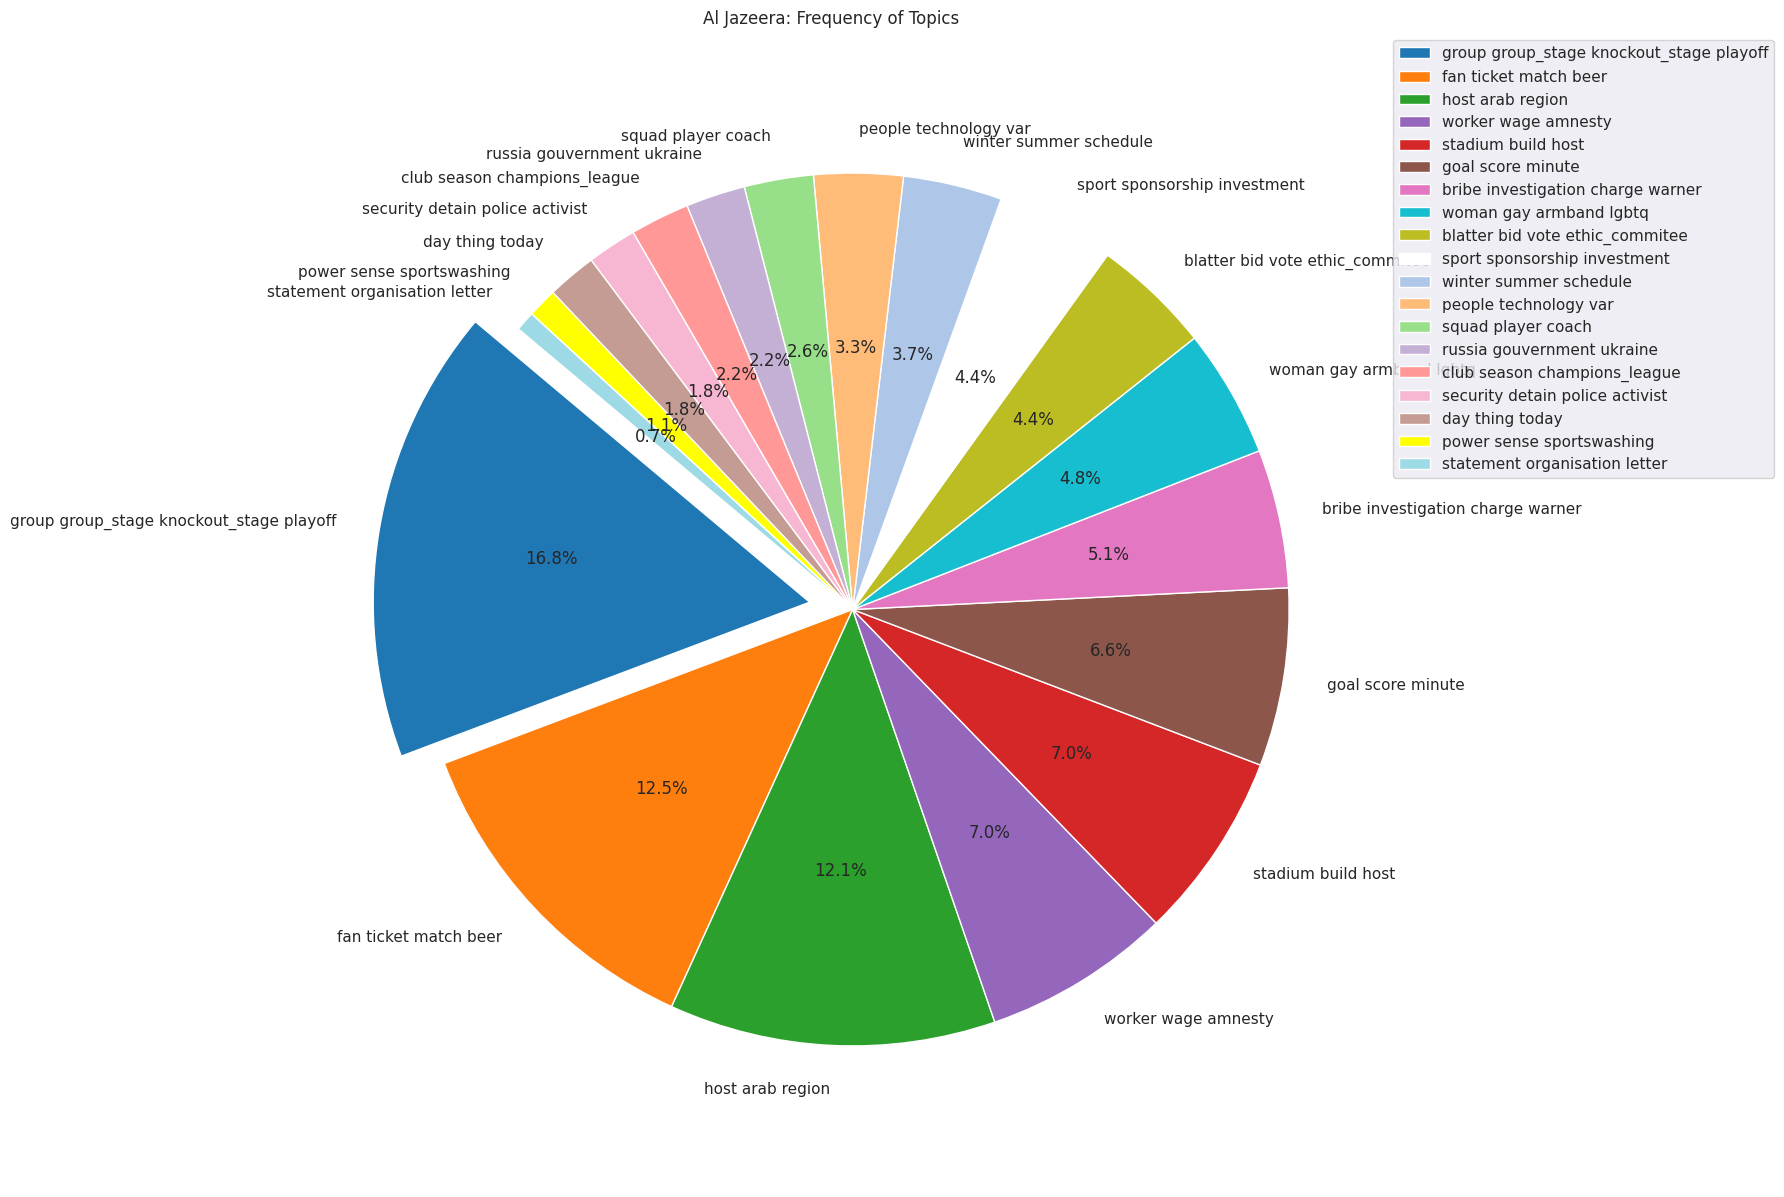

In [9]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' with columns 'source' and 'topic_name'
df_aljazerra = df.loc[df['source'] == 'aljazeera']
topic_counts = df_aljazerra['most_likely_topic_name'].value_counts()
# Customizing colors based on topic names
color_map = {
    'group group_stage knockout_stage playoff': '#1f77b4',  # blue
    'fan ticket match beer': '#ff7f0e',  # orange
    'host arab region': '#2ca02c',  # green
    'stadium build host': '#d62728',  # red
    'worker wage amnesty': '#9467bd',  # purple
    'goal score minute': '#8c564b',  # brown
    'bribe investigation charge warner': '#e377c2',  # pink
    'woman gay armband lgbtq': '#17becf',  # cyan
    'blatter bid vote ethic_commitee': '#bcbd22',  # olive
    'sport sponsorship investment': '#FFFFFF',  # white
    'winter summer schedule': '#aec7e8',  # light blue
    'people technology var': '#ffbb78',  # light orange
    'squad player coach': '#98df8a',  # light green
    'club season champions_league': '#ff9896',  # light red
    'russia gouvernment ukraine': '#c5b0d5',  # light purple
    'day thing today': '#c49c94',  # light brown
    'security detain police activist': '#f7b6d2',  # light pink
    'power sense sportswashing': '#FFFF00',  # cyan (same as woman gay armband lgbtq)
    'statement organisation letter': '#9edae5'  # light cyan
}

# Get colors for each topic
colors = [color_map.get(topic, 'gray') for topic in topic_counts.index]

# Exploding the slice with the highest frequency
explode = [0.1 if i == 0 else 0 for i in range(len(topic_counts))]

# Plotting
plt.figure(figsize=(13, 15))
plt.pie(topic_counts, labels=topic_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Al Jazeera: Frequency of Topics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



## The guardian

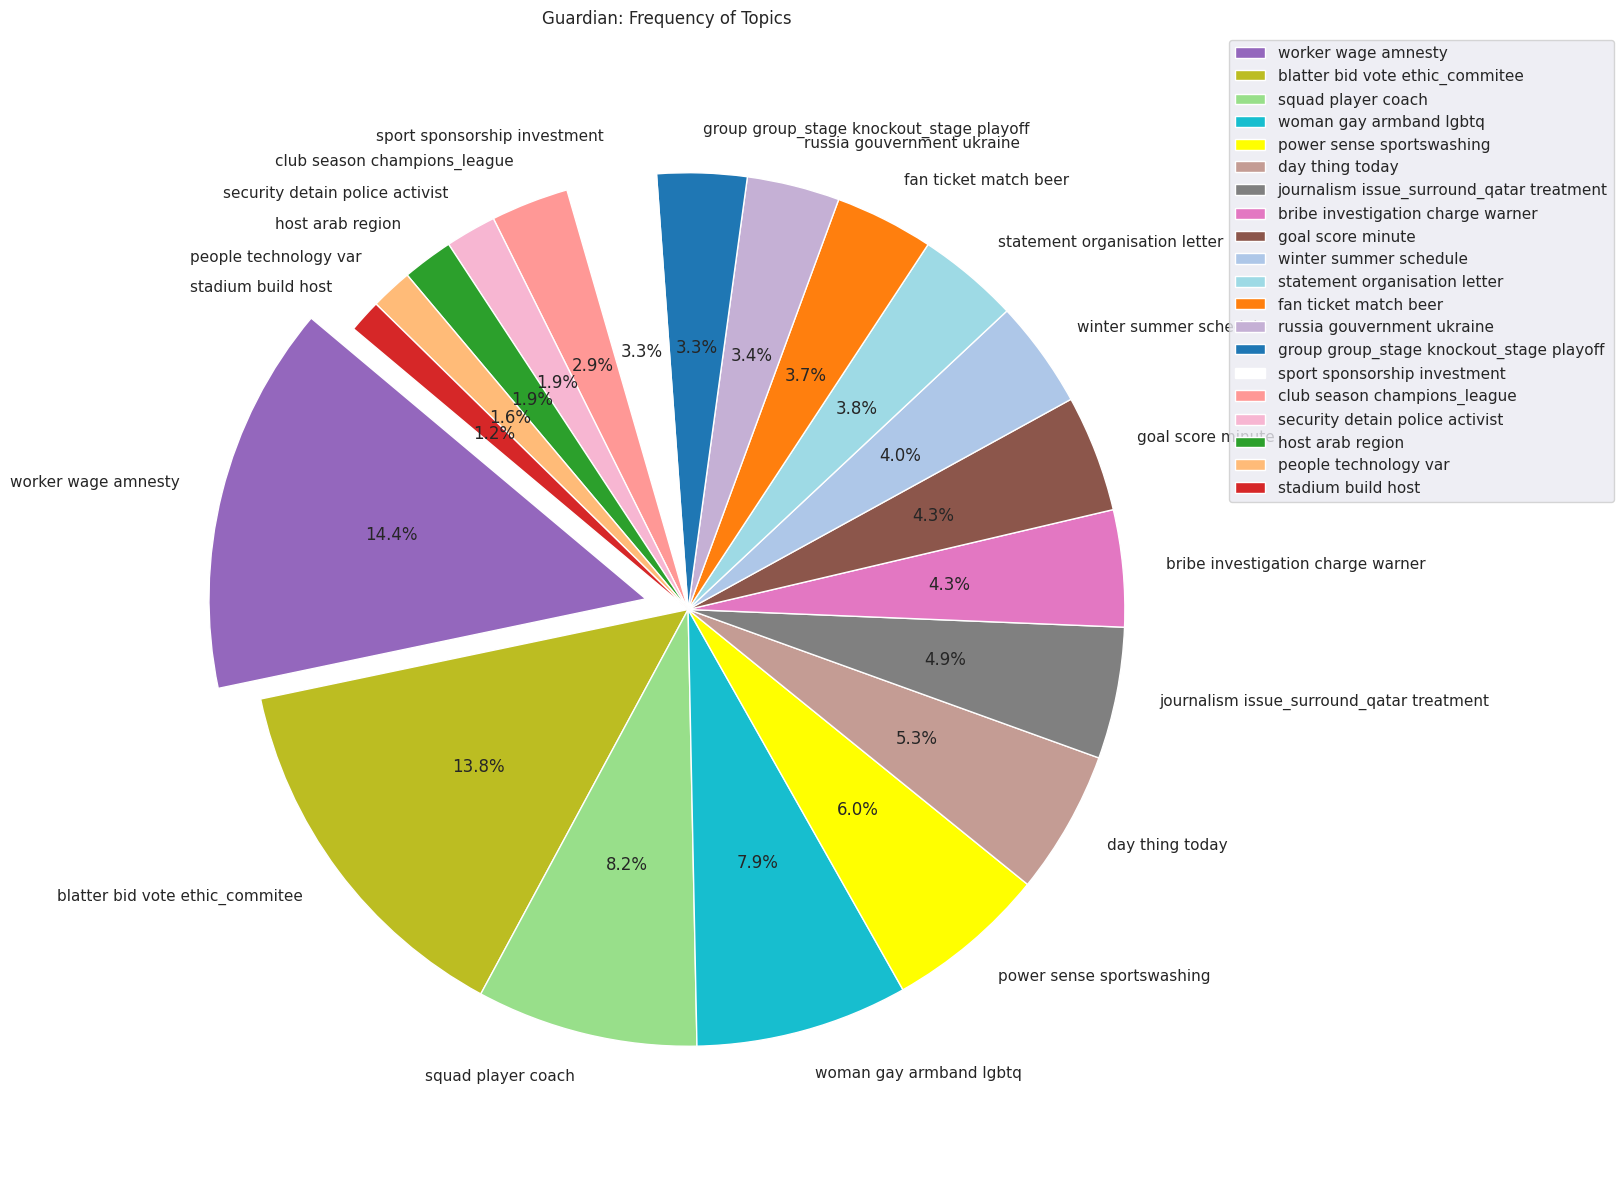

In [10]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' with columns 'source' and 'topic_name'
df_guardian = df.loc[df['source'] == 'guardian']
topic_counts = df_guardian['most_likely_topic_name'].value_counts()

# Customizing colors based on topic names
color_map = {
    'group group_stage knockout_stage playoff': '#1f77b4',  # blue
    'fan ticket match beer': '#ff7f0e',  # orange
    'host arab region': '#2ca02c',  # green
    'stadium build host': '#d62728',  # red
    'worker wage amnesty': '#9467bd',  # purple
    'goal score minute': '#8c564b',  # brown
    'bribe investigation charge warner': '#e377c2',  # pink
    'woman gay armband lgbtq': '#17becf',  # cyan
    'blatter bid vote ethic_commitee': '#bcbd22',  # olive
    'sport sponsorship investment': '#FFFFFF',  # white
    'winter summer schedule': '#aec7e8',  # light blue
    'people technology var': '#ffbb78',  # light orange
    'squad player coach': '#98df8a',  # light green
    'club season champions_league': '#ff9896',  # light red
    'russia gouvernment ukraine': '#c5b0d5',  # light purple
    'day thing today': '#c49c94',  # light brown
    'security detain police activist': '#f7b6d2',  # light pink
    'power sense sportswashing': '#FFFF00',  # cyan (same as woman gay armband lgbtq)
    'statement organisation letter': '#9edae5'  # light cyan
}

# Get colors for each topic
colors = [color_map.get(topic, 'gray') for topic in topic_counts.index]

# Exploding the slice with the highest frequency
explode = [0.1 if i == 0 else 0 for i in range(len(topic_counts))]

# Plotting
plt.figure(figsize=(13, 15))
plt.pie(topic_counts, labels=topic_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Guardian: Frequency of Topics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# All topic Algaurdian vs aljazerra absolut(Balken-diagramm)

## Aljazerra

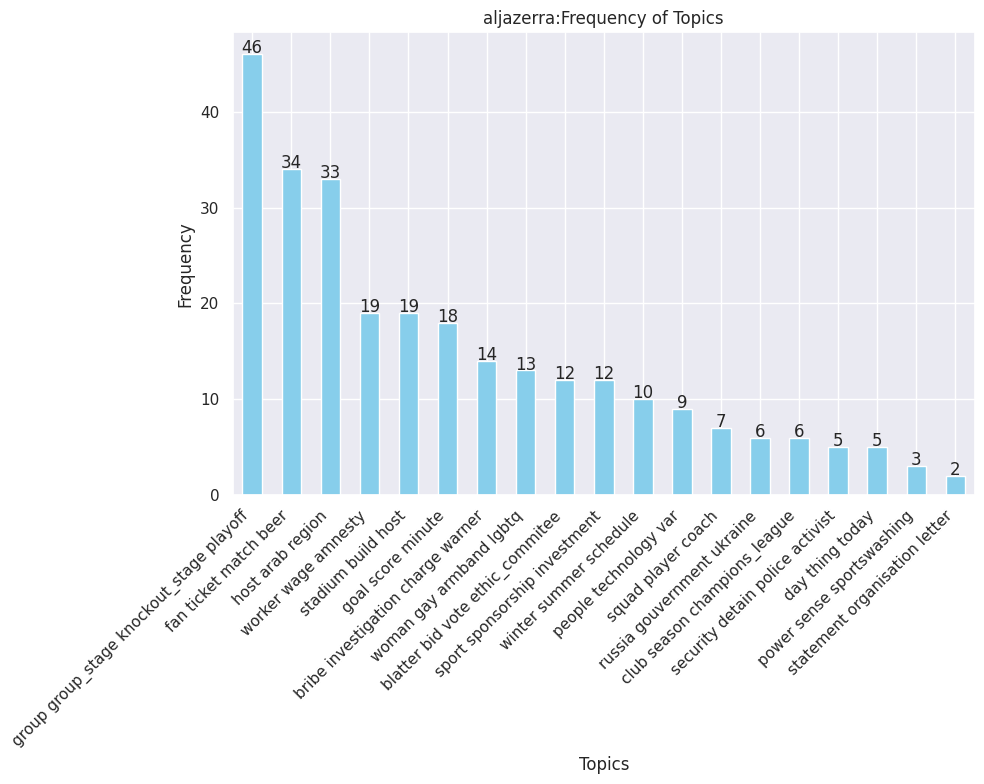

In [11]:
# Assuming your DataFrame is named 'df' with columns 'source' and 'topic_name'
topic_counts = df_aljazerra['most_likely_topic_name'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
topic_counts.plot(kind='bar', color='skyblue')
plt.title('aljazerra:Frequency of Topics')
plt.xlabel('Topics')
plt.ylabel('Frequency')

# Adding text labels
for i, count in enumerate(topic_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## The guardian

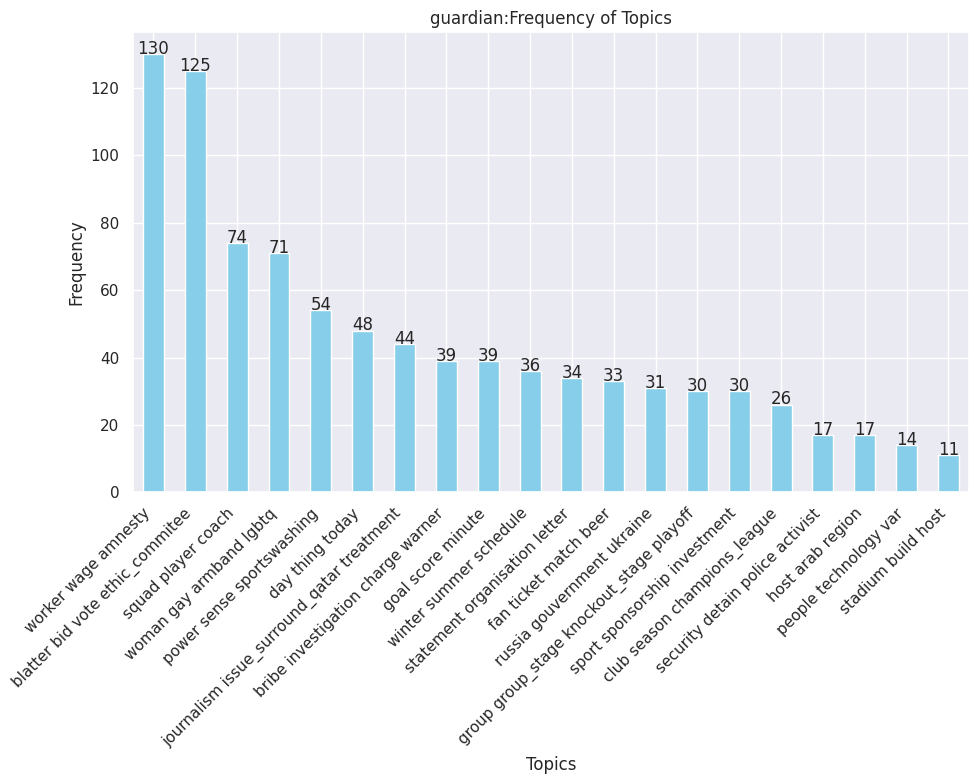

In [12]:
# Assuming your DataFrame is named 'df' with columns 'source' and 'topic_name'
topic_counts = df_guardian['most_likely_topic_name'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
topic_counts.plot(kind='bar', color='skyblue')
plt.title('guardian:Frequency of Topics')
plt.xlabel('Topics')
plt.ylabel('Frequency')

# Adding text labels
for i, count in enumerate(topic_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Sentiments pro Topic pro Jahr: Guardian vs Aljazeera


## sentiment scores für aljazerra

In [37]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined 'df_aljazerra' DataFrame and 'sentiments' SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

aljazerra_unique_topics = df_aljazerra['most_likely_topic_name'].unique()

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['year', 'Positive_title', 'Negative_title', 'Neutral_title', 
                                'Positive_text', 'Negative_text', 'Neutral_text'])

for aljazerra_unique_topic in aljazerra_unique_topics:
    df_aljazerra_unique_topic_df = df_aljazerra[df_aljazerra['most_likely_topic_name'] == aljazerra_unique_topic]
    
    # Extract sentiment scores for title
    df_aljazerra_unique_topic_df["Positive_title"] = df_aljazerra_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["pos"])
    df_aljazerra_unique_topic_df["Negative_title"] = df_aljazerra_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["neg"])
    df_aljazerra_unique_topic_df["Neutral_title"] = df_aljazerra_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["neu"])
    
    # Extract sentiment scores for text
    df_aljazerra_unique_topic_df["Positive_text"] = df_aljazerra_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["pos"])
    df_aljazerra_unique_topic_df["Negative_text"] = df_aljazerra_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["neg"])
    df_aljazerra_unique_topic_df["Neutral_text"] = df_aljazerra_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["neu"])
    
    # Append to results DataFrame
    results = pd.concat([results, df_aljazerra_unique_topic_df], ignore_index=True)


/tmp/ipykernel_191233/3695217855.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_191233/3695217855.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_191233/3695217855.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

## Sentiment (ohne Zeitachse) aljazerra

/tmp/ipykernel_191233/1537857636.py:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




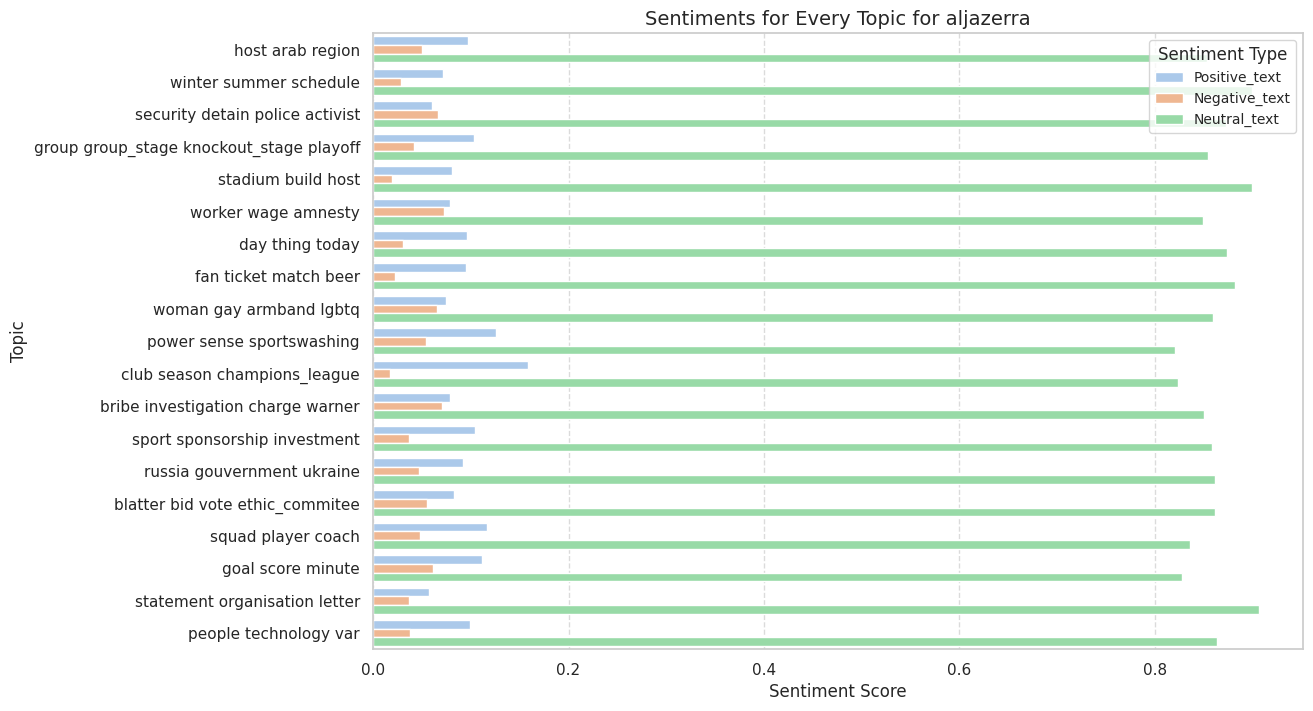

In [14]:
# Melt the DataFrame to have sentiments in a single column
melted_results = results.melt(id_vars=['most_likely_topic_name'], 
                              value_vars=['Positive_text', 'Negative_text', 'Neutral_text'],
                              var_name='Sentiment_Type', value_name='Sentiment_Score')

# Set style and palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot the sentiments for each topic as a stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_results, x='Sentiment_Score', y='most_likely_topic_name', hue='Sentiment_Type', orient='h', ci=None)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.title('Sentiments for Every Topic for aljazerra', fontsize=14)
plt.legend(title='Sentiment Type', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for clarity
plt.show()




## sentiment scores for guradian

In [16]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming you have already defined 'df_aljazerra' DataFrame and 'sentiments' SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

guardian_unique_topics = df_guardian['most_likely_topic_name'].unique()

# Create an empty DataFrame to store the results
results1 = pd.DataFrame(columns=['year', 'Positive_title', 'Negative_title', 'Neutral_title', 
                                'Positive_text', 'Negative_text', 'Neutral_text'])

for guardian_unique_topic in guardian_unique_topics:
    df_guardian_unique_topic_df = df_guardian[df_guardian['most_likely_topic_name'] == guardian_unique_topic]
    
    # Extract sentiment scores for title
    df_guardian_unique_topic_df["Positive_title"] = df_guardian_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["pos"])
    df_guardian_unique_topic_df["Negative_title"] = df_guardian_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["neg"])
    df_guardian_unique_topic_df["Neutral_title"] = df_guardian_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["neu"])
    
    # Extract sentiment scores for text
    df_guardian_unique_topic_df["Positive_text"] = df_guardian_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["pos"])
    df_guardian_unique_topic_df["Negative_text"] = df_guardian_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["neg"])
    df_guardian_unique_topic_df["Neutral_text"] = df_guardian_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["neu"])
    
    # Assign source
    df_guardian_unique_topic_df['source'] = 'The Guardian'
    
    # Append to results DataFrame
    results1 = pd.concat([results1, df_guardian_unique_topic_df], ignore_index=True)


/tmp/ipykernel_191233/2269631011.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_191233/2269631011.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_191233/2269631011.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

## Sentiment (ohne Zeitachse) guradian

/tmp/ipykernel_191233/3308112003.py:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




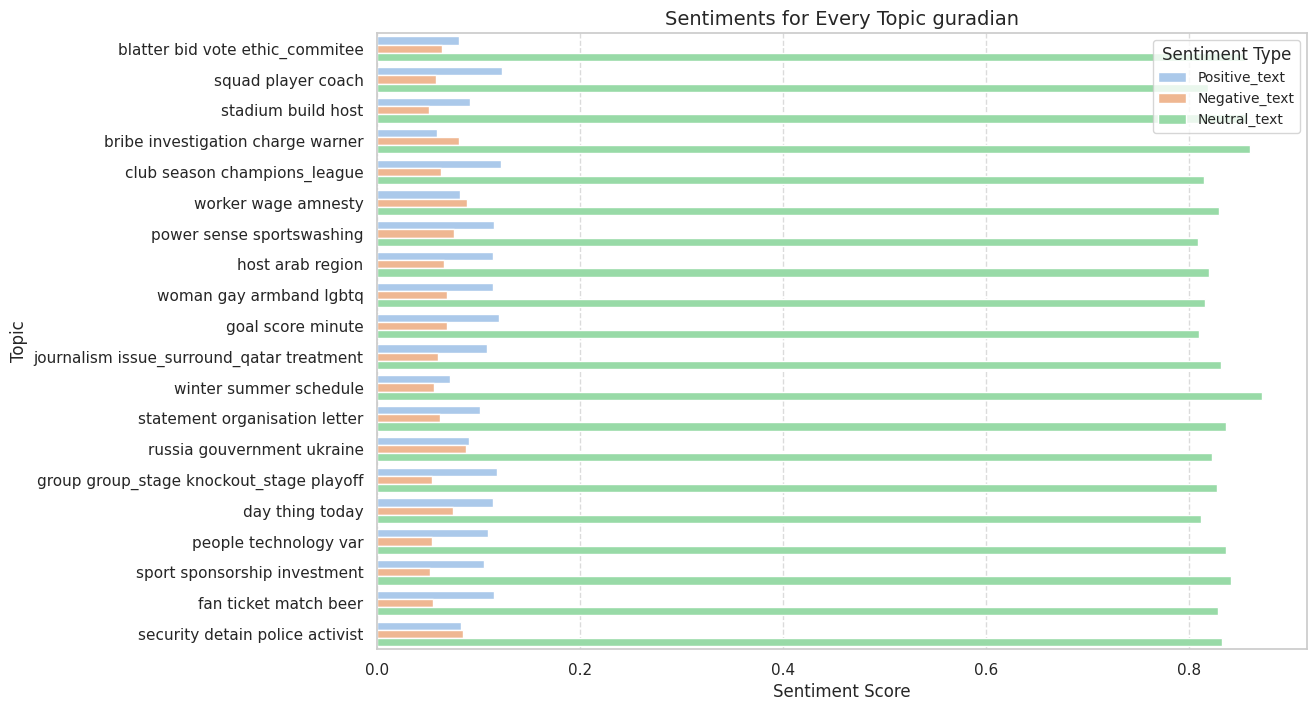

In [17]:
# Melt the DataFrame to have sentiments in a single column
melted_results = results1.melt(id_vars=['most_likely_topic_name'], 
                              value_vars=['Positive_text', 'Negative_text', 'Neutral_text'],
                              var_name='Sentiment_Type', value_name='Sentiment_Score')

# Set style and palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Plot the sentiments for each topic as a stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_results, x='Sentiment_Score', y='most_likely_topic_name', hue='Sentiment_Type', orient='h', ci=None)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.title('Sentiments for Every Topic guradian', fontsize=14)
plt.legend(title='Sentiment Type', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for clarity
plt.show()


## Sentiment charts side by side

/tmp/ipykernel_191233/1951791122.py:20: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipykernel_191233/1951791122.py:38: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




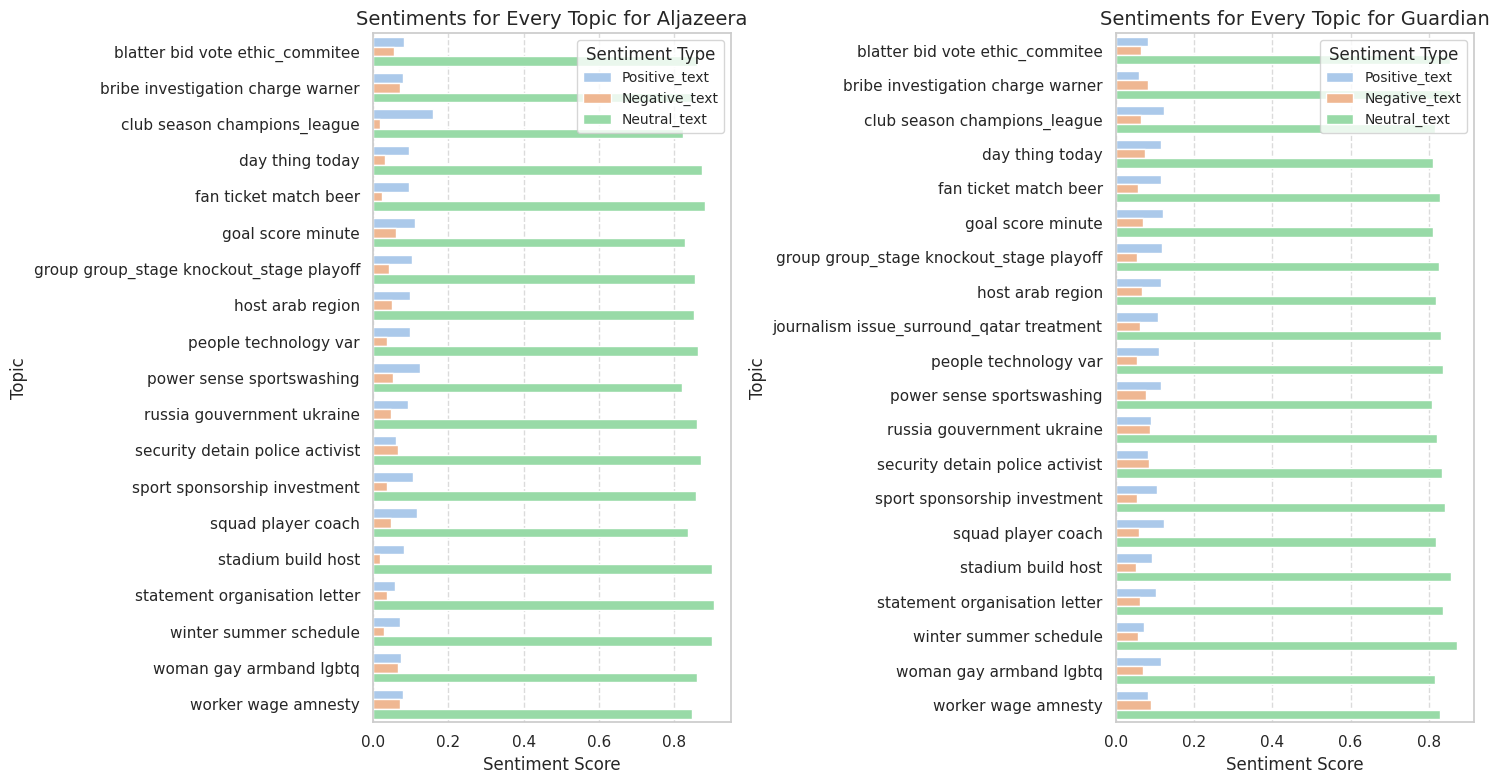

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort results and results1 by most_likely_topic_name
sorted_results = results.sort_values(by='most_likely_topic_name')
sorted_results1 = results1.sort_values(by='most_likely_topic_name')

# First plot for aljazerra
melted_results_aljazerra = sorted_results.melt(id_vars=['most_likely_topic_name'], 
                                               value_vars=['Positive_text', 'Negative_text', 'Neutral_text'],
                                               var_name='Sentiment_Type', value_name='Sentiment_Score')

# Set style and palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create the first plot (Aljazeera) on the left
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.barplot(data=melted_results_aljazerra, x='Sentiment_Score', y='most_likely_topic_name', hue='Sentiment_Type', orient='h', ci=None)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.title('Sentiments for Every Topic for Aljazeera', fontsize=14)
plt.legend(title='Sentiment Type', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for clarity

# Second plot for guardian
melted_results_guardian = sorted_results1.melt(id_vars=['most_likely_topic_name'], 
                                               value_vars=['Positive_text', 'Negative_text', 'Neutral_text'],
                                               var_name='Sentiment_Type', value_name='Sentiment_Score')

# Set style and palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create the second plot (Guardian) on the right
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.barplot(data=melted_results_guardian, x='Sentiment_Score', y='most_likely_topic_name', hue='Sentiment_Type', orient='h', ci=None)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.title('Sentiments for Every Topic for Guardian', fontsize=14)
plt.legend(title='Sentiment Type', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for clarity

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


## Sentiment Analysis for Topic: aljazerra (Visualization)

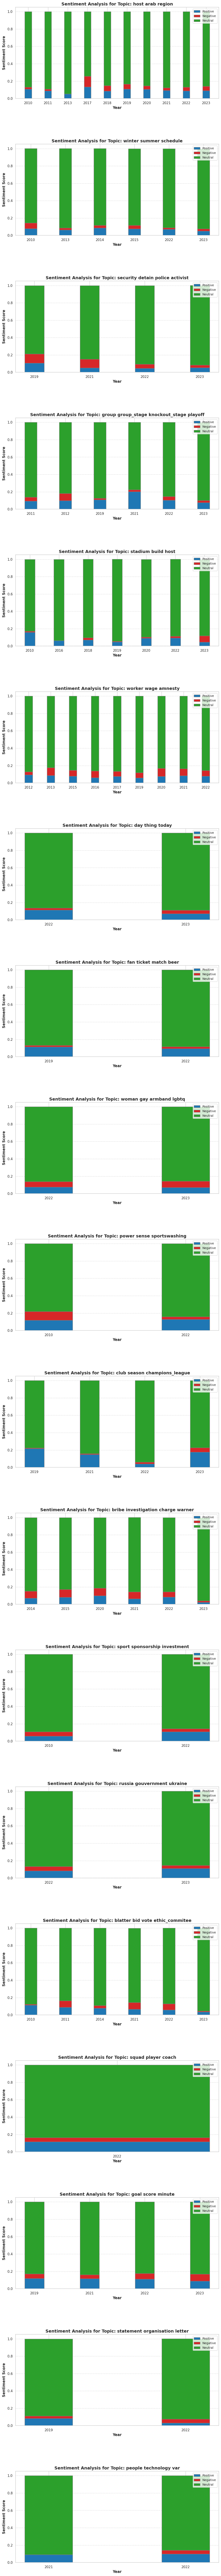

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors for positive, negative, and neutral sentiments
colors = ['#1f77b4', '#d62728', '#2ca02c']

aljazerra_unique_topics = results['most_likely_topic_name'].unique()
fig, axes = plt.subplots(len(aljazerra_unique_topics), 1, figsize=(12, 8 * len(aljazerra_unique_topics)))

for idx, aljazerra_unique_topic in enumerate(aljazerra_unique_topics):

    df_aljazerra_unique_topic_df = results[results['most_likely_topic_name'] == aljazerra_unique_topic]    
    # Check if DataFrame is empty
    if not df_aljazerra_unique_topic_df.empty:
        years = df_aljazerra_unique_topic_df['year'].unique()
        num_years = len(years)
        
        # Sort years
        years = np.sort(years)
        
        # Set the width of the bars
        bar_width = 0.35
        
        # Set the positions of the bars on the x-axis
        r = np.arange(num_years)

        # Plotting positive sentiment
        ax = axes[idx]
        ax.bar(r, df_aljazerra_unique_topic_df.groupby('year')['Positive_text'].mean().loc[years], color=colors[0], width=bar_width, edgecolor='grey', label='Positive')
        # Plotting negative sentiment
        ax.bar(r, df_aljazerra_unique_topic_df.groupby('year')['Negative_text'].mean().loc[years], bottom=df_aljazerra_unique_topic_df.groupby('year')['Positive_text'].mean().loc[years], color=colors[1], width=bar_width, edgecolor='grey', label='Negative')
        # Plotting neutral sentiment
        ax.bar(r, df_aljazerra_unique_topic_df.groupby('year')['Neutral_text'].mean().loc[years], bottom=df_aljazerra_unique_topic_df.groupby('year')['Positive_text'].mean().loc[years] + df_aljazerra_unique_topic_df.groupby('year')['Negative_text'].mean().loc[years], color=colors[2], width=bar_width, edgecolor='grey', label='Neutral')

        # Adding labels and title
        ax.set_xlabel('Year', fontweight='bold', fontsize=12)
        ax.set_ylabel('Sentiment Score', fontweight='bold', fontsize=12)
        ax.set_title(f'Sentiment Analysis for Topic: {aljazerra_unique_topic}', fontweight='bold', fontsize=14)
        ax.set_xticks(r)
        ax.set_xticklabels(years)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.legend(loc='upper right', fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()


## Sentiment Analysis for Topic: guardian (Visualization)

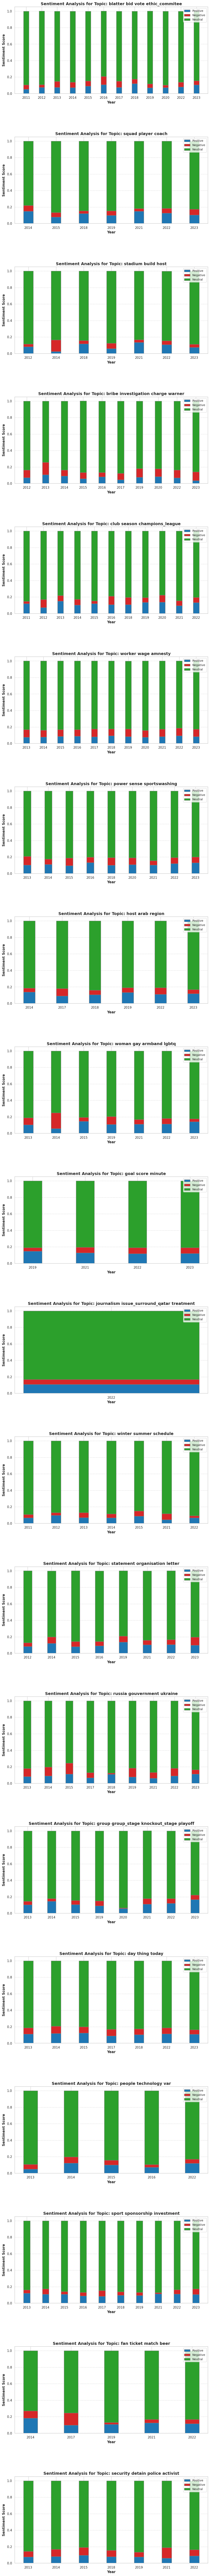

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors for positive, negative, and neutral sentiments
colors = ['#1f77b4', '#d62728', '#2ca02c']

guardian_unique_topics = results1['most_likely_topic_name'].unique()
#important_topics = ['woman gay armband lgbtq','worker wage amnesty','bribe investigation charge warner','journalism issue_surround_qatar treatment',
 #                   'fan ticket match beer','power sense sportswashing']
fig, axes = plt.subplots(len(guardian_unique_topics), 1, figsize=(12, 8 * len(guardian_unique_topics)))

for idx, guardian_unique_topic in enumerate(guardian_unique_topics):

    df_guardian_unique_topic_df = results1[results1['most_likely_topic_name'] == guardian_unique_topic]
    
    # Check if DataFrame is empty
    if not df_guardian_unique_topic_df.empty:
        years = df_guardian_unique_topic_df['year'].unique()
        num_years = len(years)
        
        # Sort years
        years = np.sort(years)
        
        # Set the width of the bars
        bar_width = 0.35
        
        # Set the positions of the bars on the x-axis
        r = np.arange(num_years)

        # Plotting positive sentiment
        ax = axes[idx]
        ax.bar(r, df_guardian_unique_topic_df.groupby('year')['Positive_text'].mean().loc[years], color=colors[0], width=bar_width, edgecolor='grey', label='Positive')
        # Plotting negative sentiment
        ax.bar(r, df_guardian_unique_topic_df.groupby('year')['Negative_text'].mean().loc[years], bottom=df_guardian_unique_topic_df.groupby('year')['Positive_text'].mean().loc[years], color=colors[1], width=bar_width, edgecolor='grey', label='Negative')
        # Plotting neutral sentiment
        ax.bar(r, df_guardian_unique_topic_df.groupby('year')['Neutral_text'].mean().loc[years], bottom=df_guardian_unique_topic_df.groupby('year')['Positive_text'].mean().loc[years] + df_guardian_unique_topic_df.groupby('year')['Negative_text'].mean().loc[years], color=colors[2], width=bar_width, edgecolor='grey', label='Neutral')

        # Adding labels and title
        ax.set_xlabel('Year', fontweight='bold', fontsize=12)
        ax.set_ylabel('Sentiment Score', fontweight='bold', fontsize=12)
        ax.set_title(f'Sentiment Analysis for Topic: {guardian_unique_topic}', fontweight='bold', fontsize=14)
        ax.set_xticks(r)
        ax.set_xticklabels(years)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.legend(loc='upper right', fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)
# Display the plot
plt.show()



## Side- by Side ansicht der Sentiments über die Zeit hinweg

/tmp/ipykernel_191233/1219151313.py:1: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



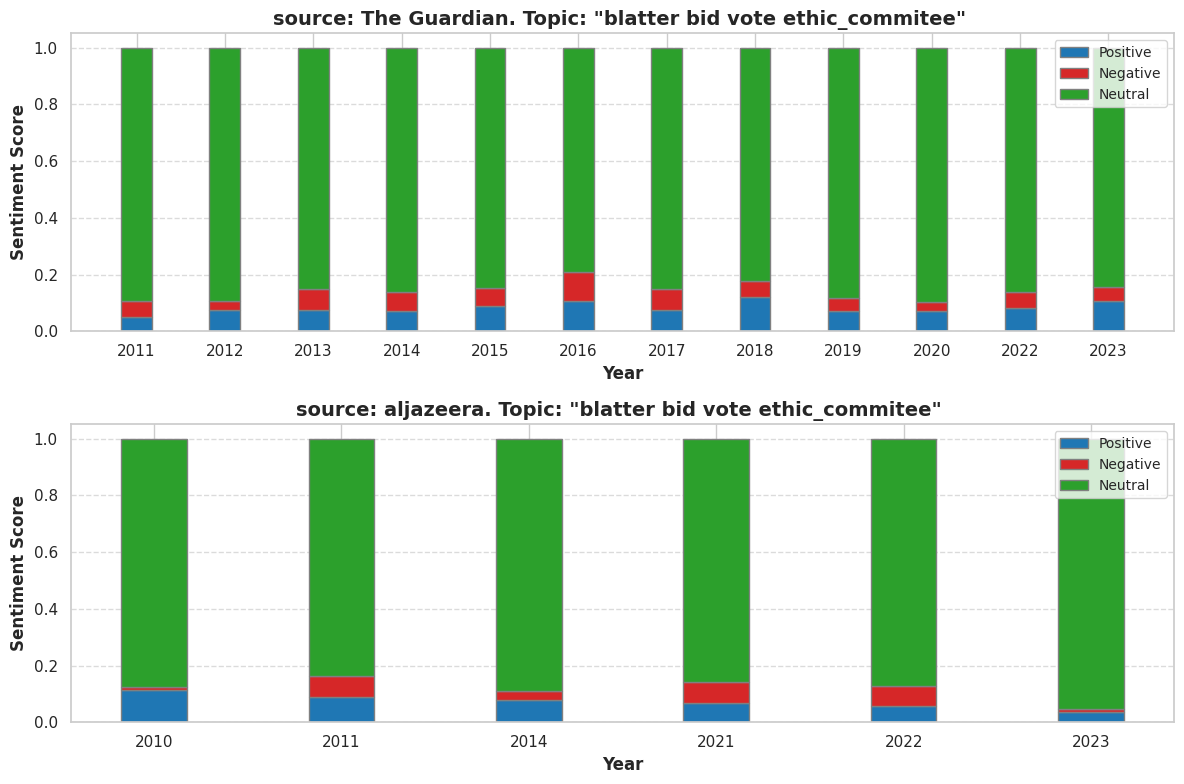

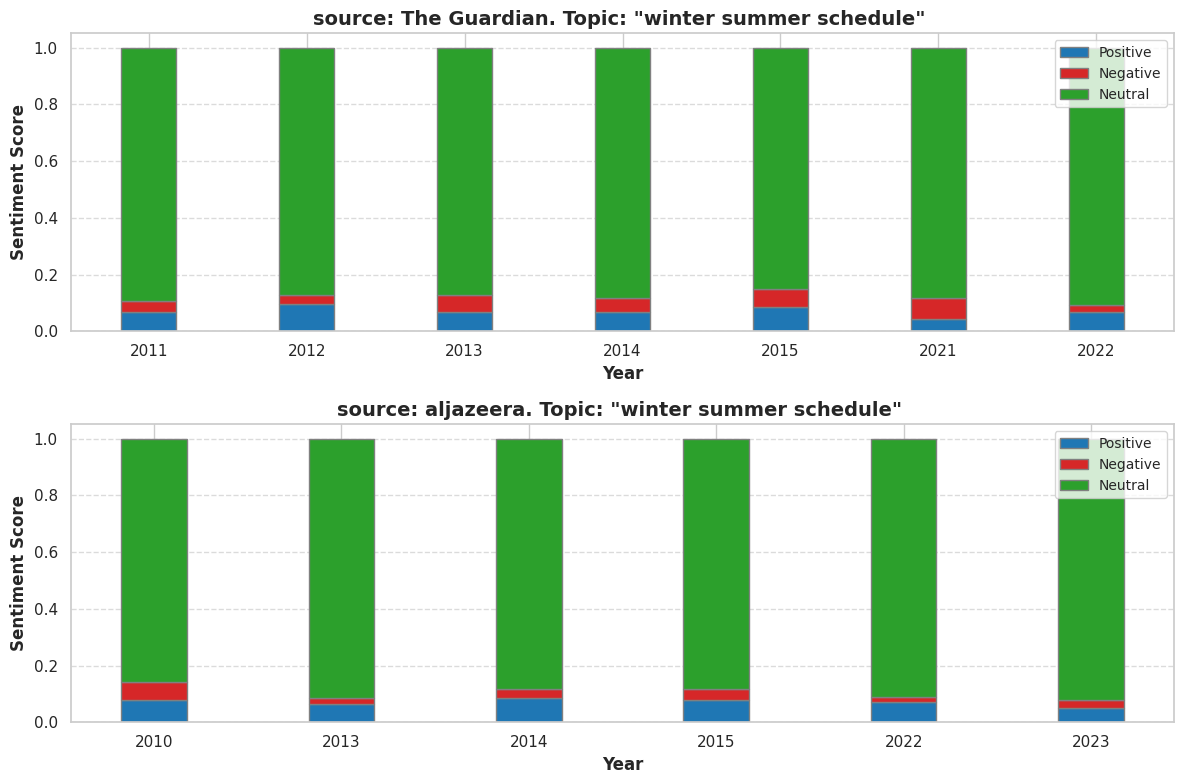

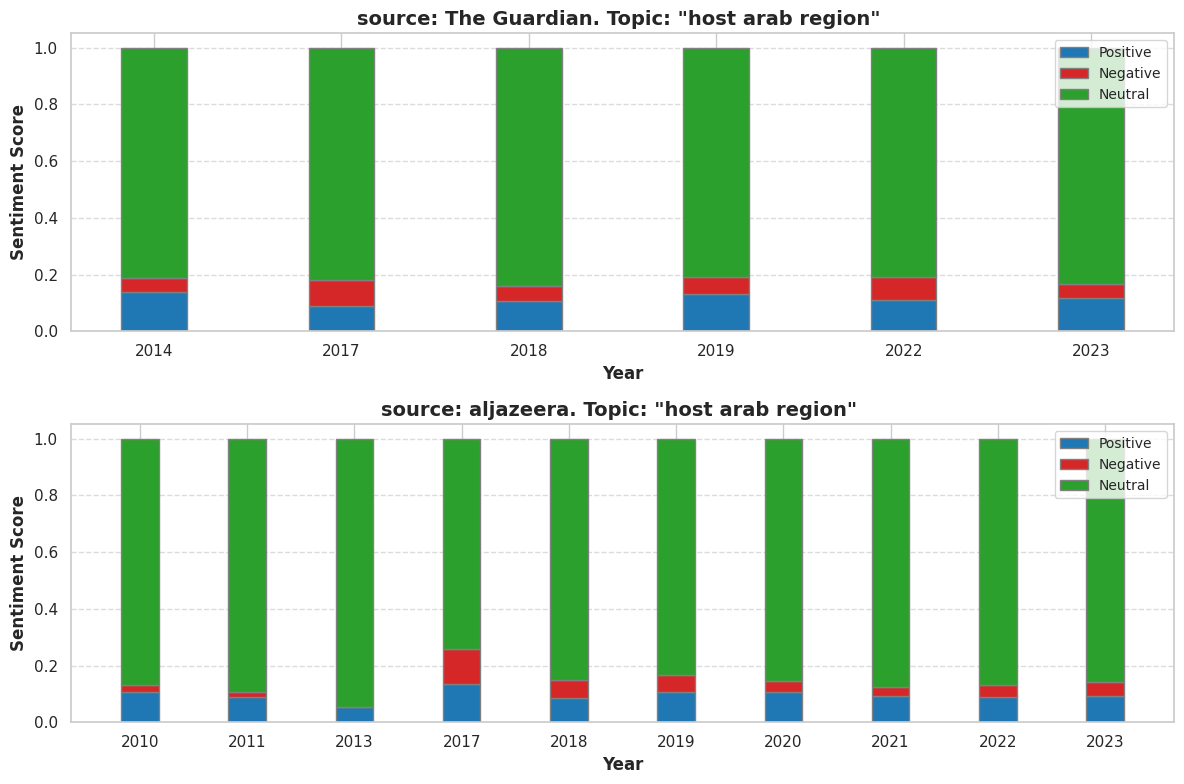

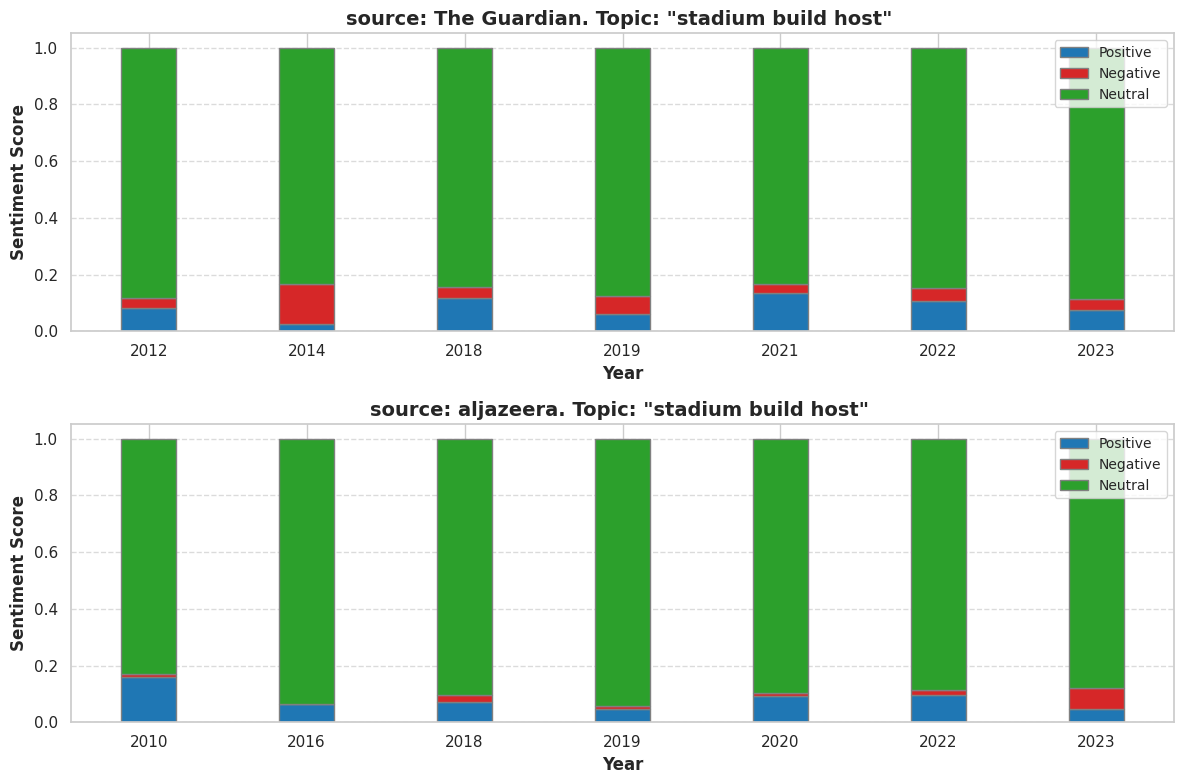

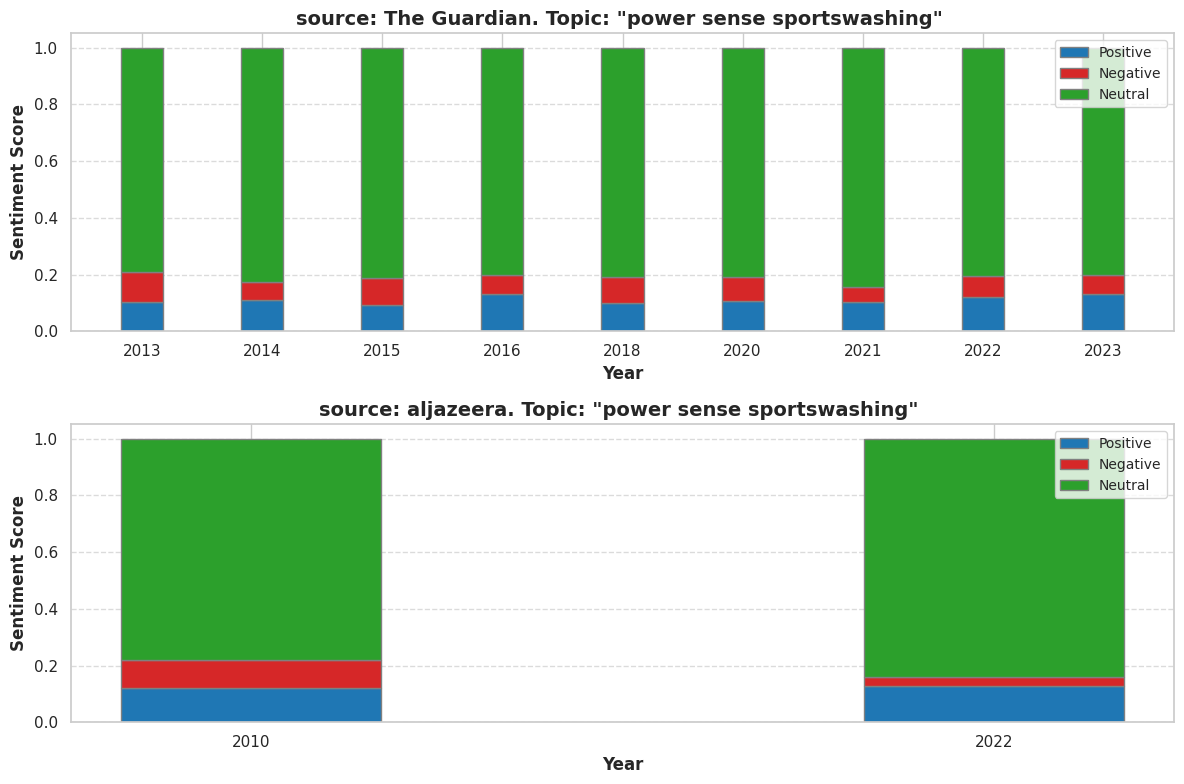

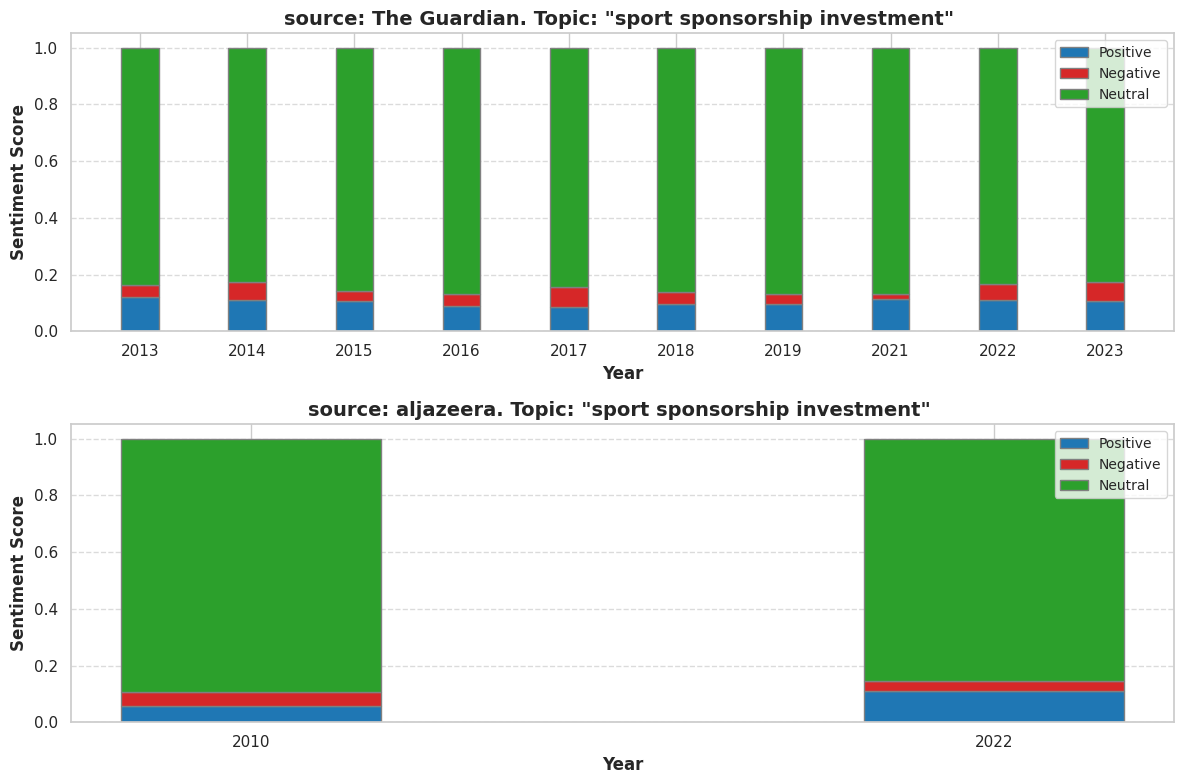

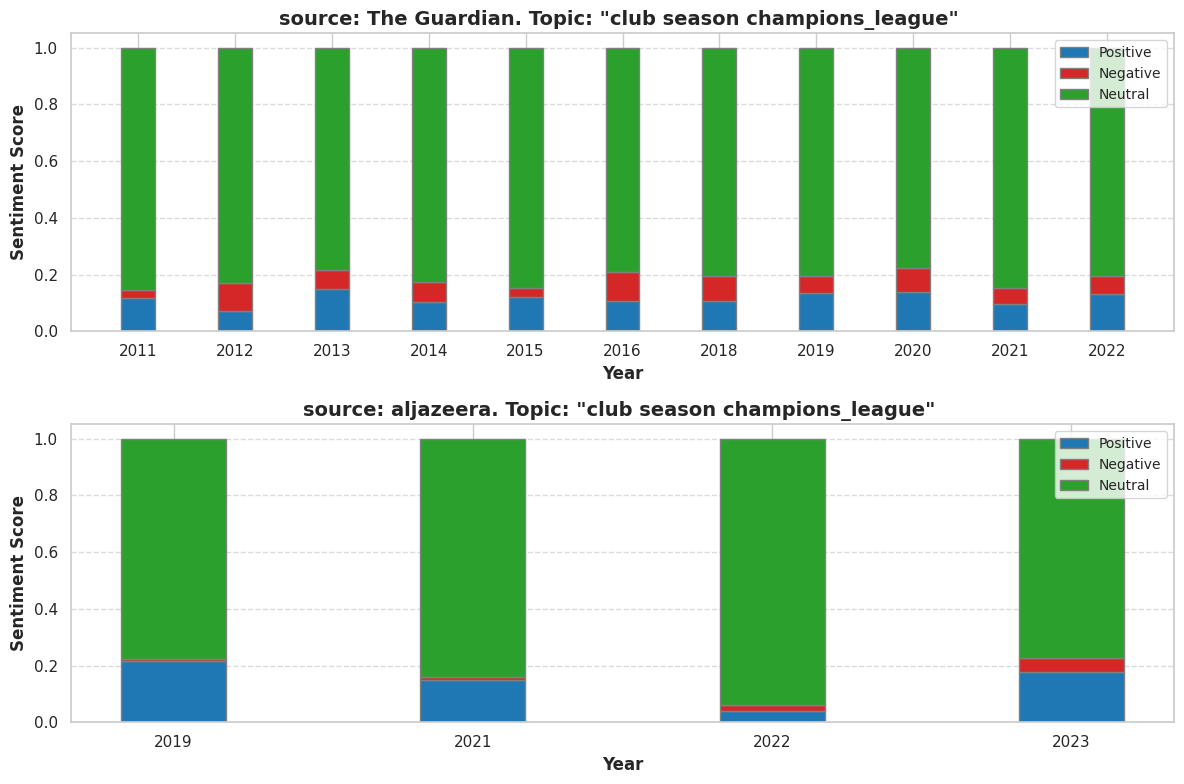

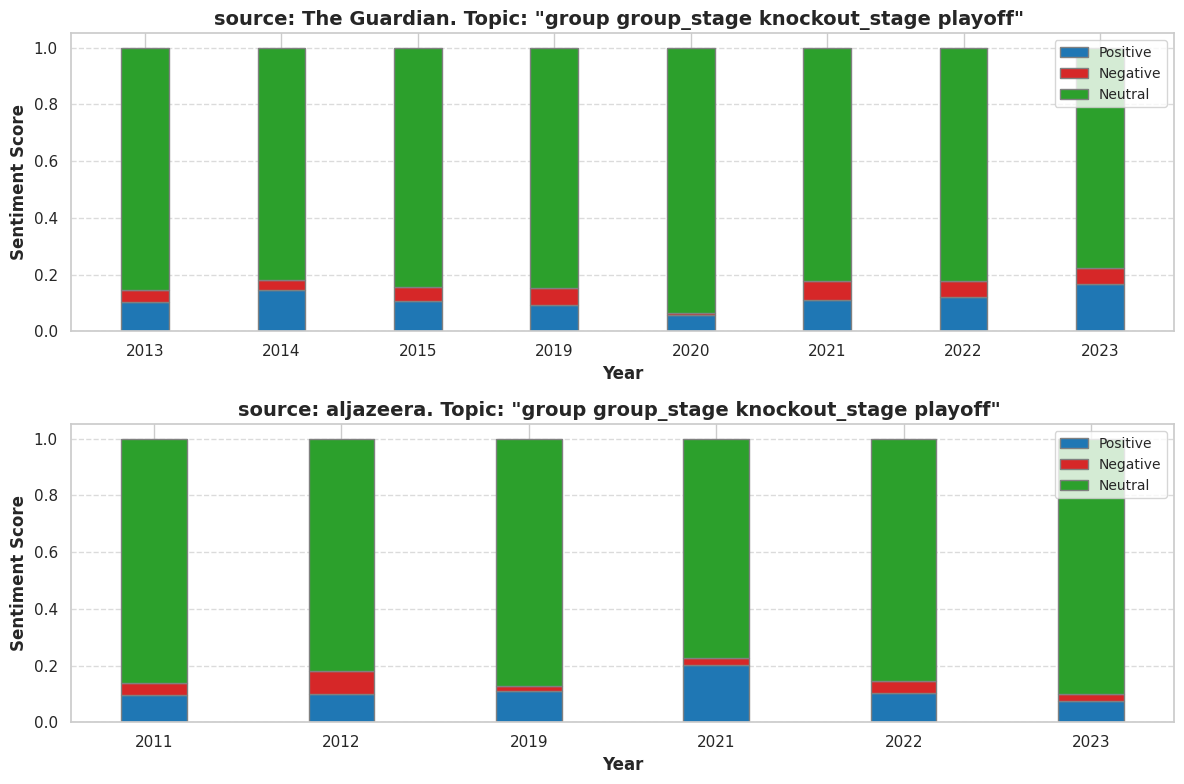

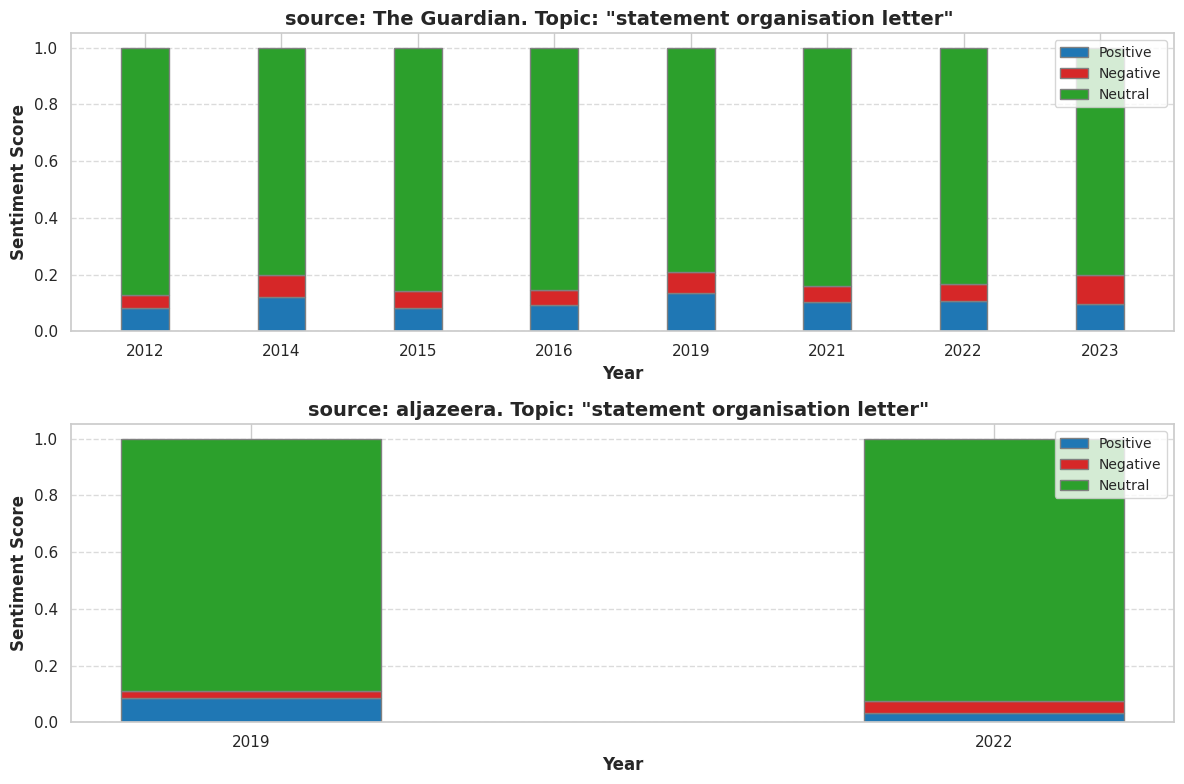

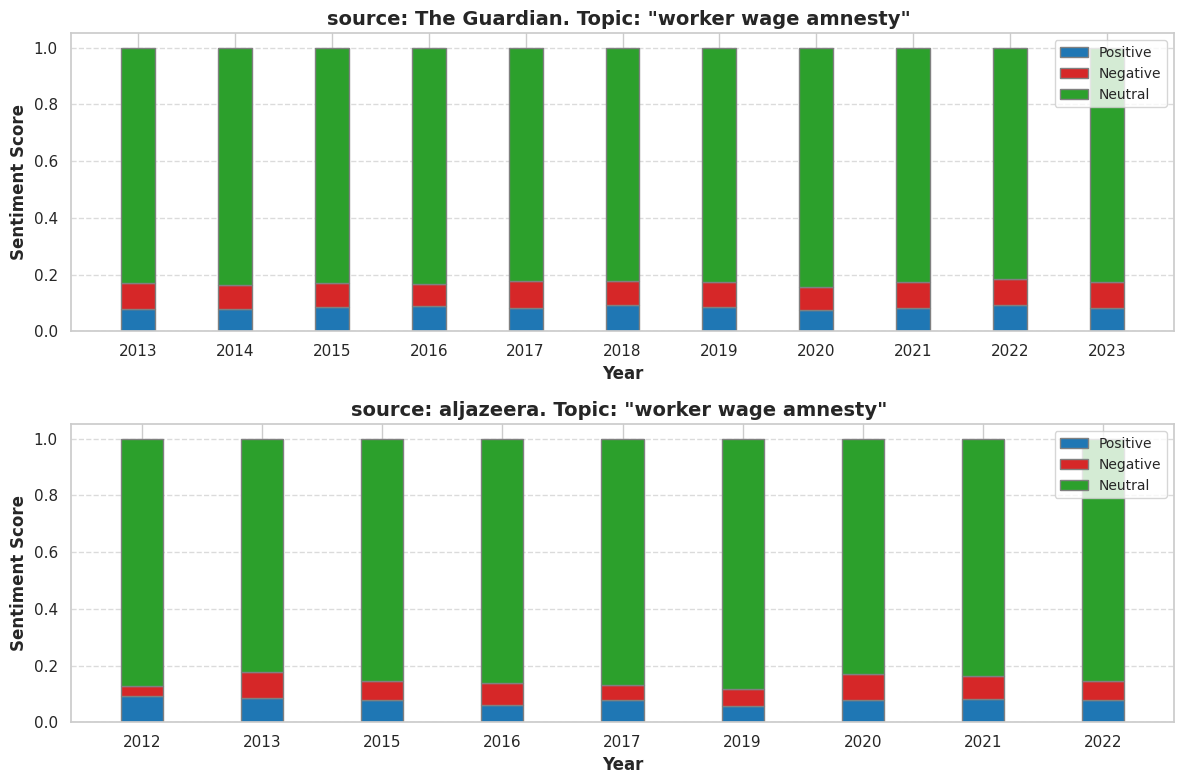

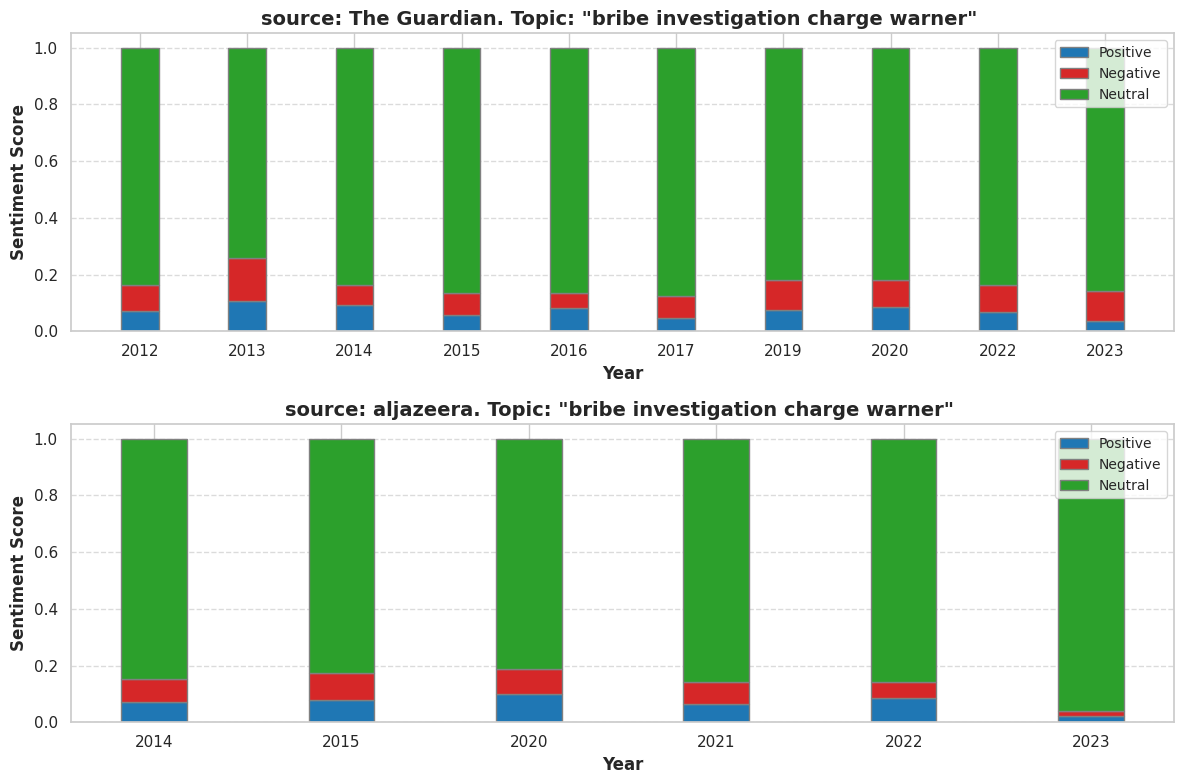

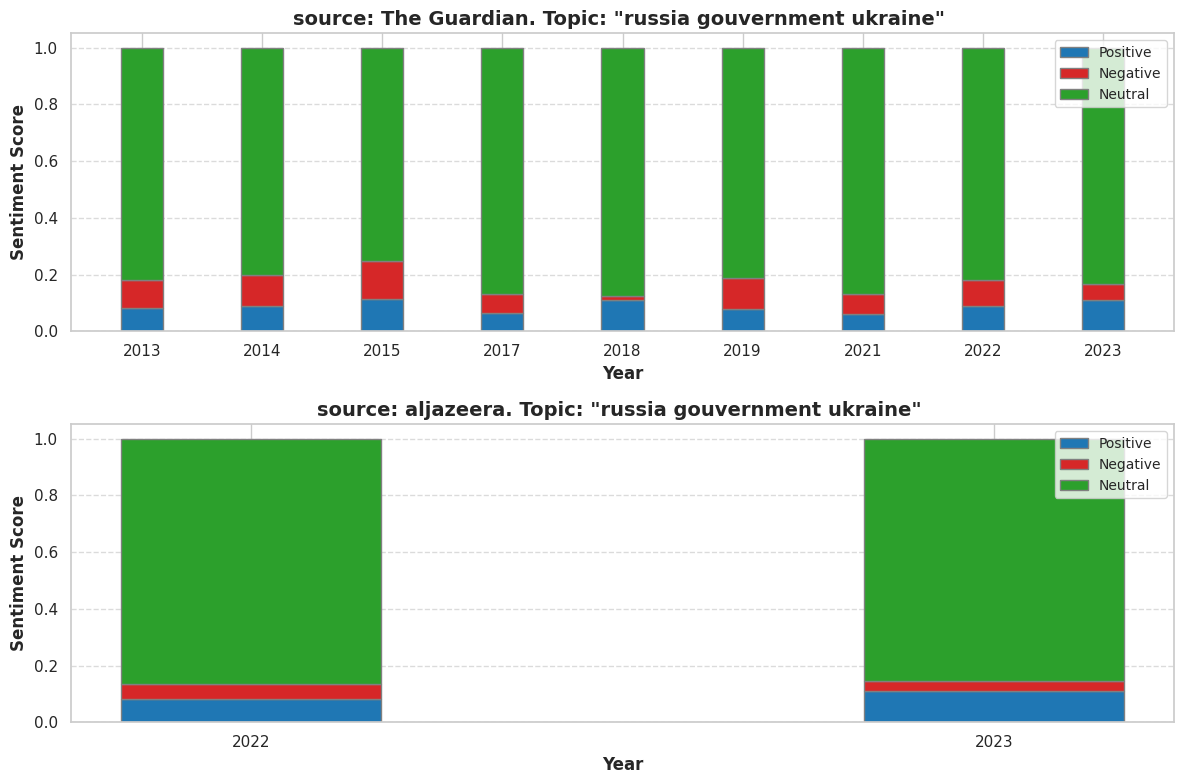

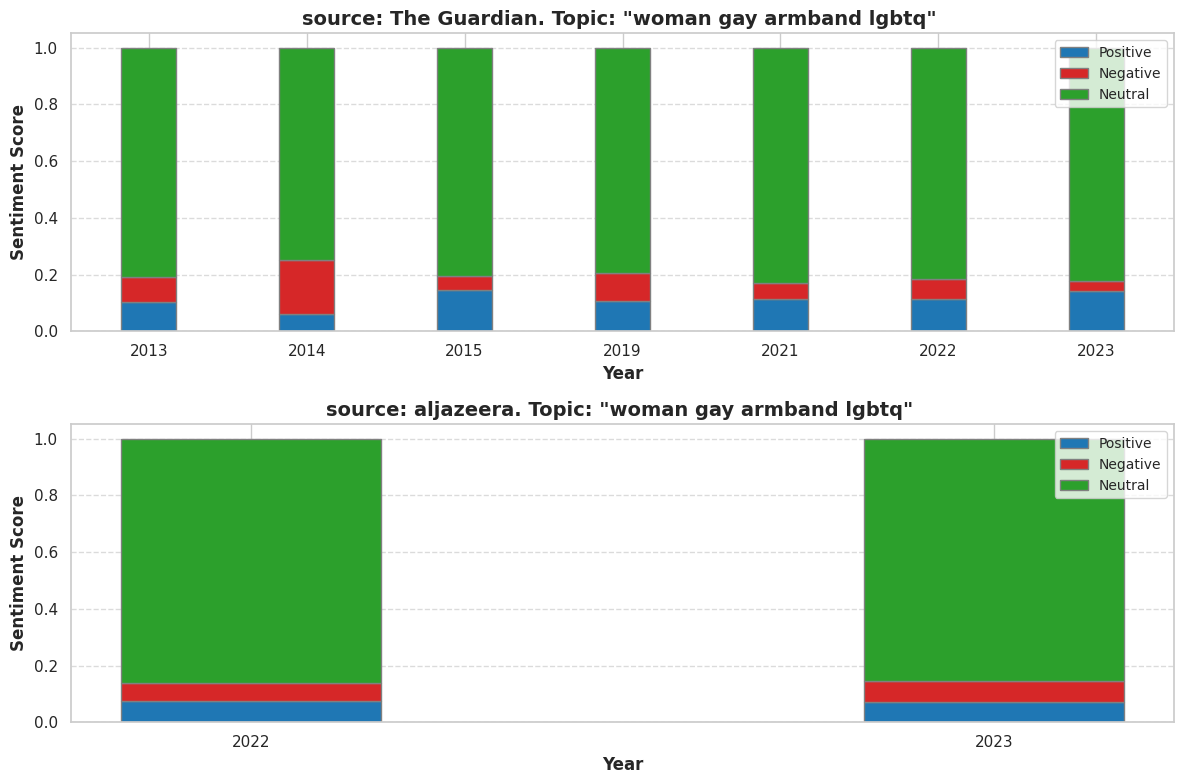

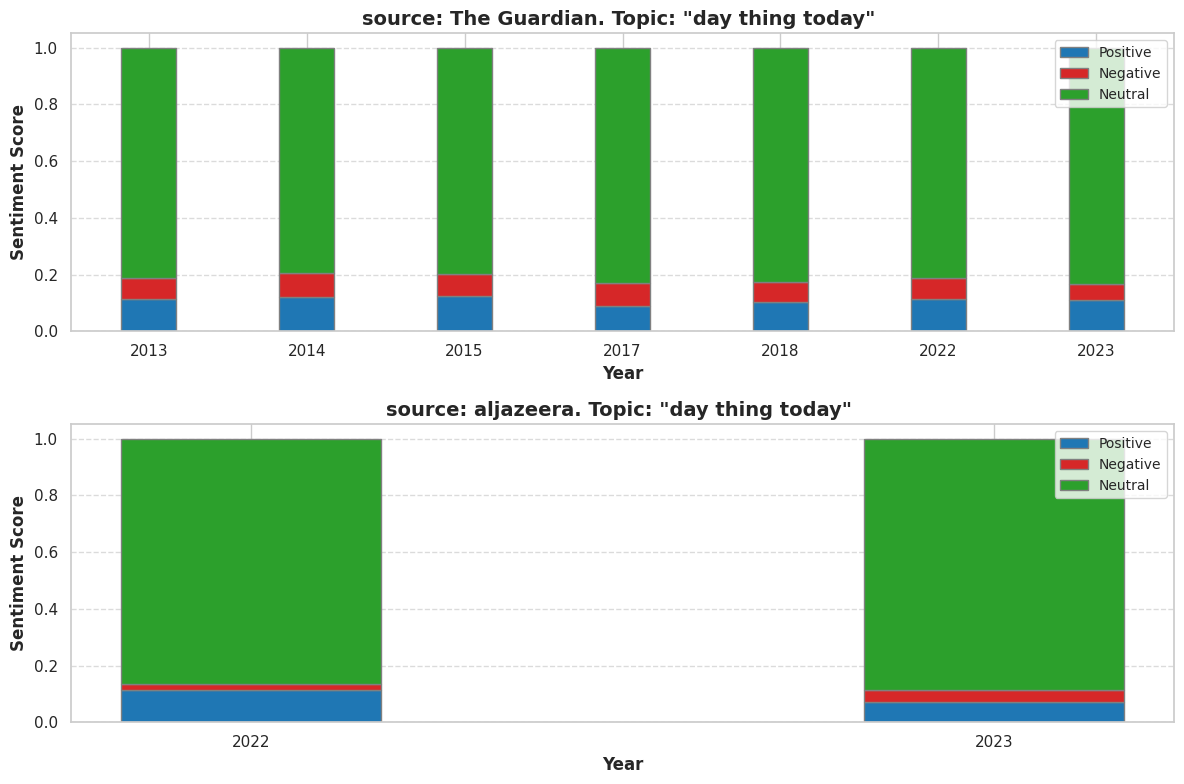

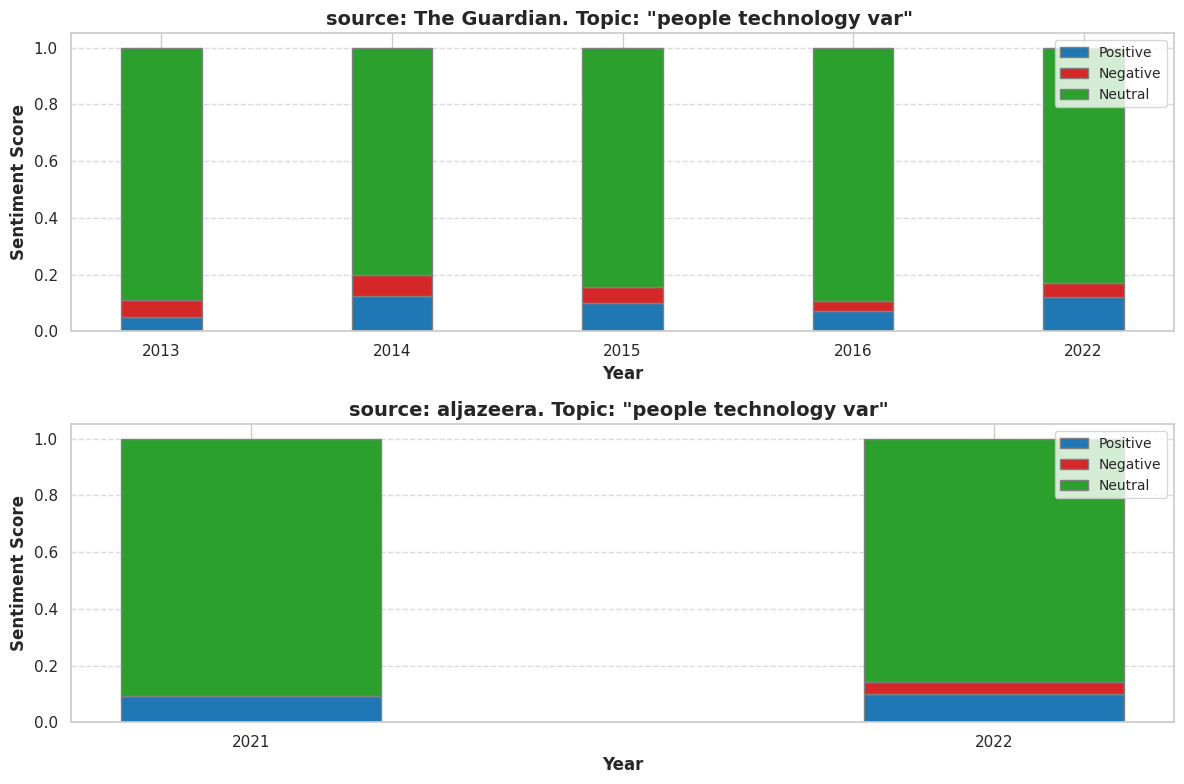

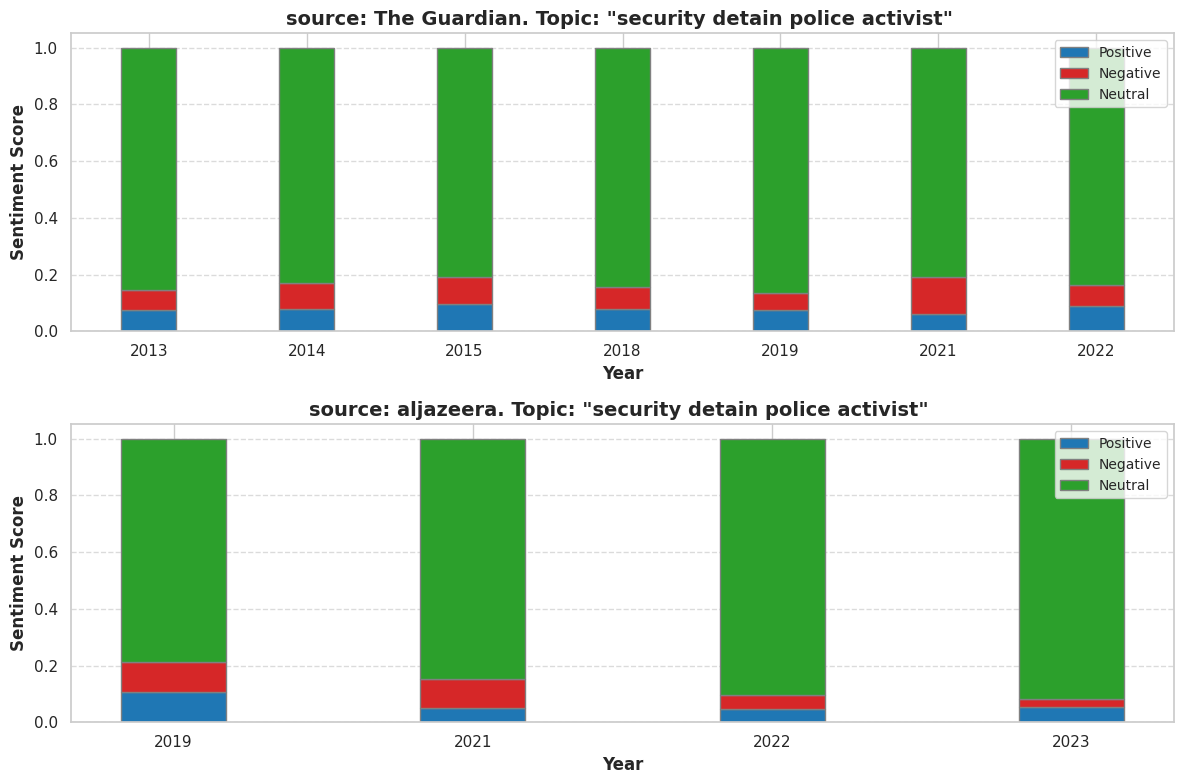

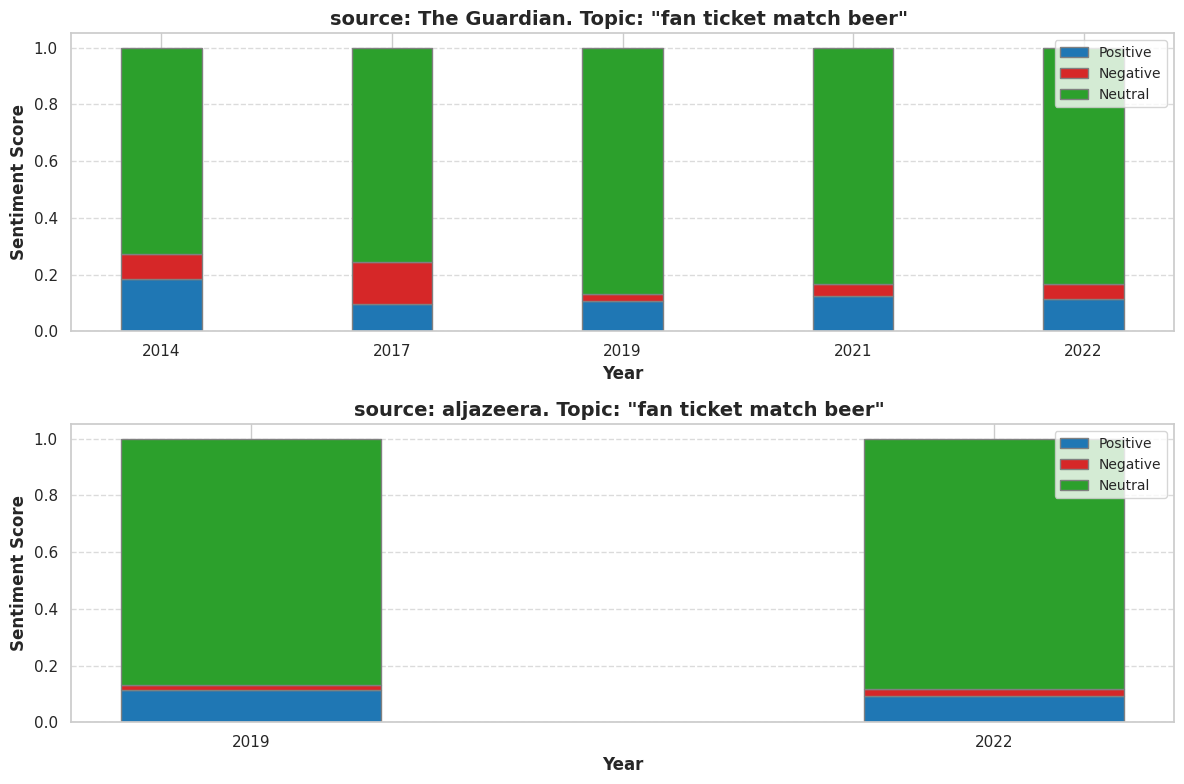

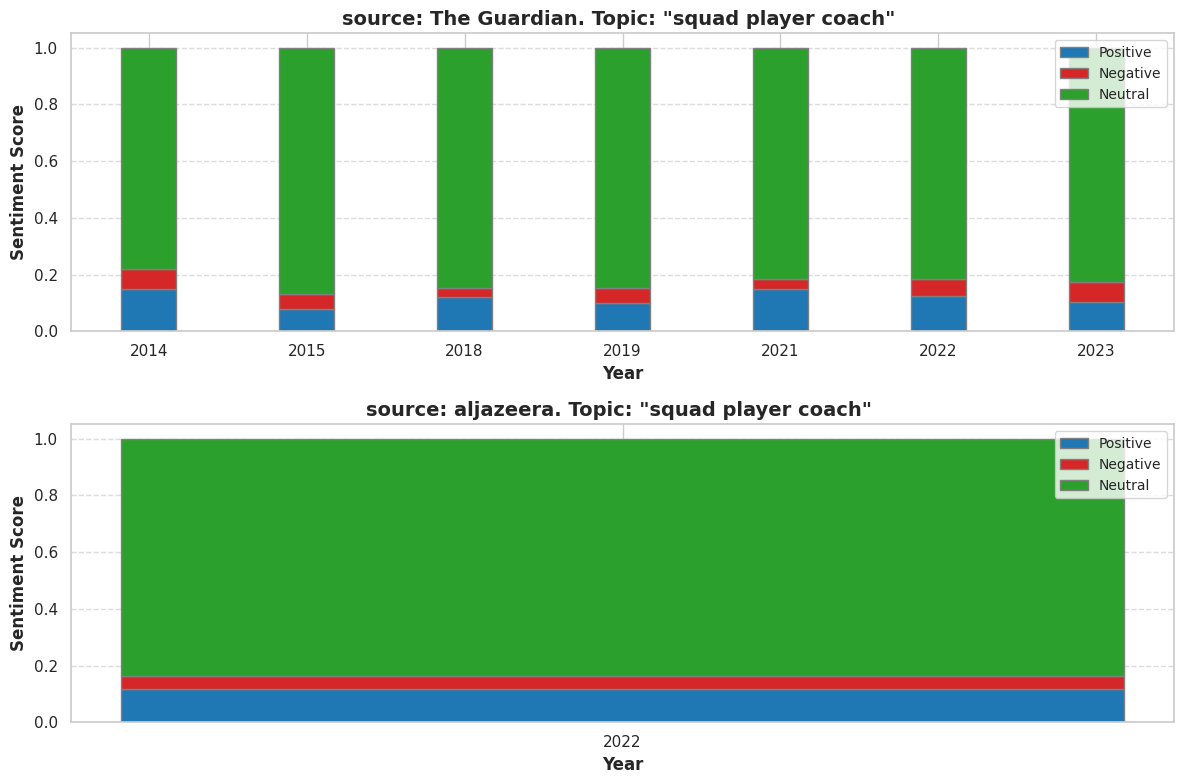

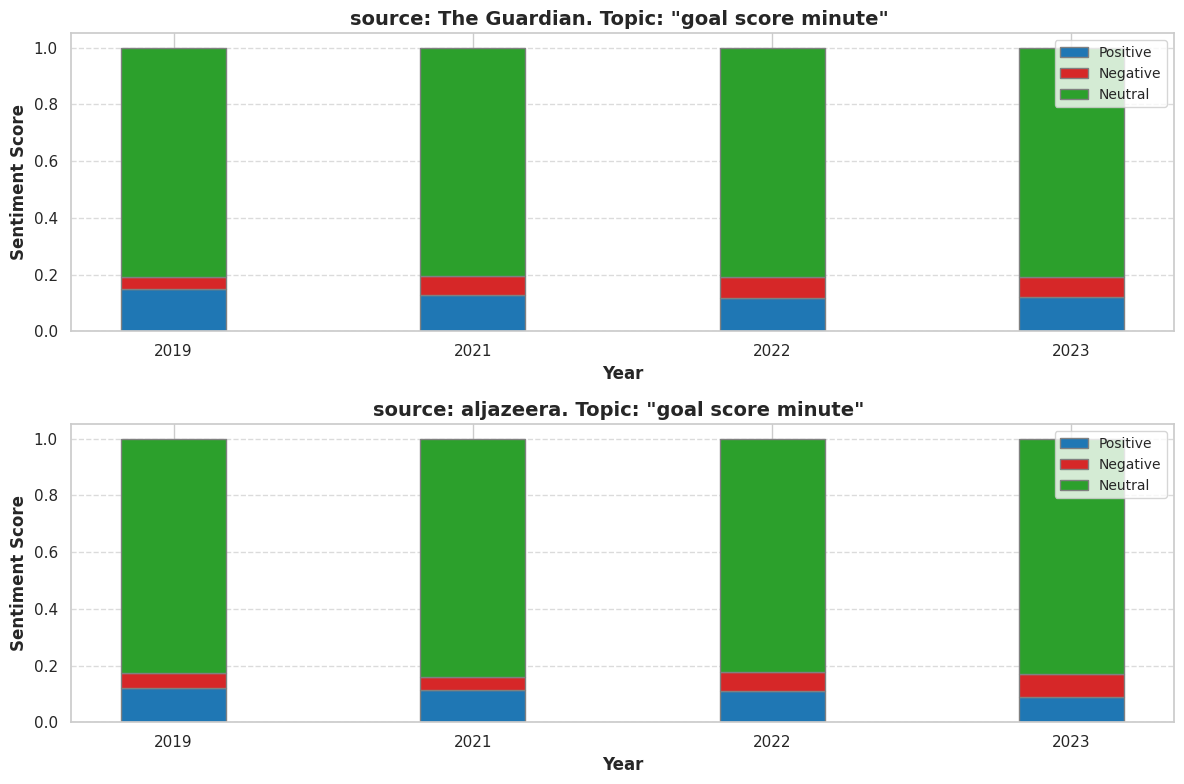

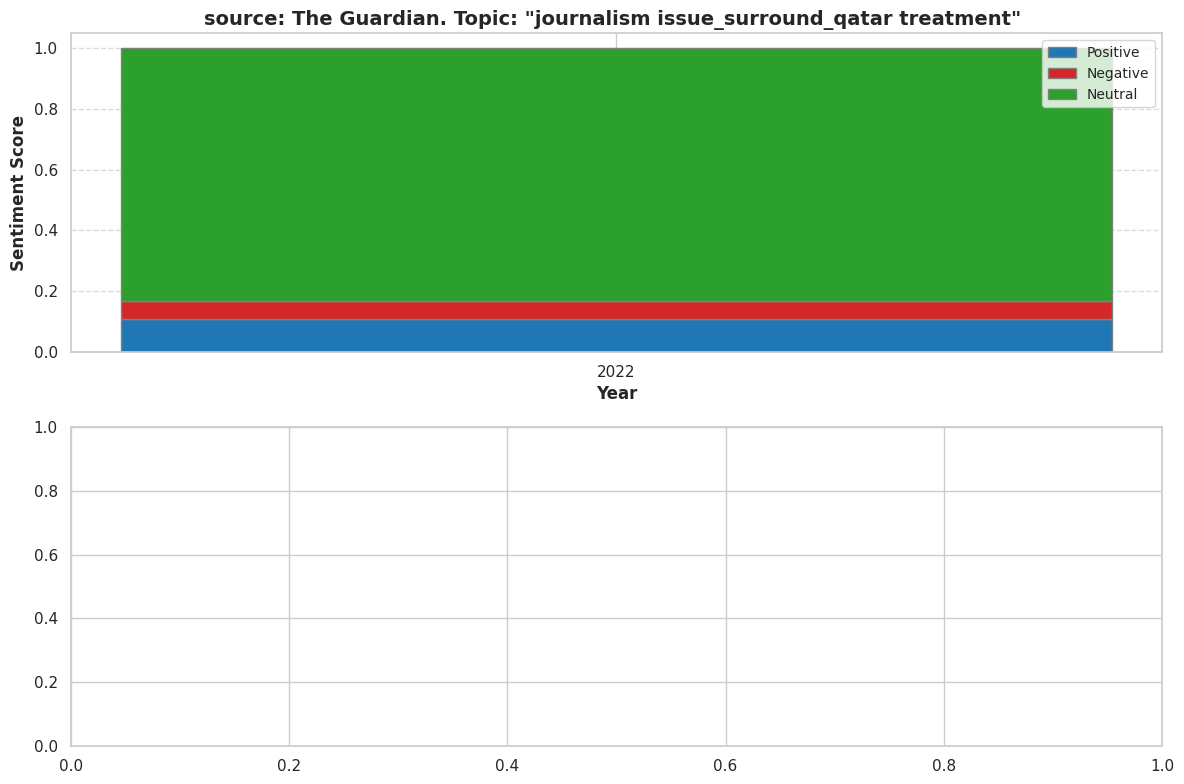

In [39]:
all_results = pd.concat([results, results1]).reset_index(drop=True, ).sort_values(by='year')

# Define colors for positive, negative, and neutral sentiments
colors = ['#1f77b4', '#d62728', '#2ca02c']

unique_topics = all_results['most_likely_topic_name'].unique()
#important_topics = ['woman gay armband lgbtq','worker wage amnesty','bribe investigation charge warner','journalism issue_surround_qatar treatment',
 #                   'fan ticket match beer','power sense sportswashing']

def plot_yearwise_topic_sentiment(ax, filtered_df):
        # Check if DataFrame is empty
    if not filtered_df.empty:
        years = filtered_df['year'].unique()
        num_years = len(years)
        
        # Sort years
        years = np.sort(years)
        
        # Set the width of the bars
        bar_width = 0.35
        
        # Set the positions of the bars on the x-axis
        r = np.arange(num_years)

        # Plotting positive sentiment
        ax.bar(r, filtered_df.groupby('year')['Positive_text'].mean().loc[years], color=colors[0], width=bar_width, edgecolor='grey', label='Positive')
        # Plotting negative sentiment
        ax.bar(r, filtered_df.groupby('year')['Negative_text'].mean().loc[years], bottom=filtered_df.groupby('year')['Positive_text'].mean().loc[years], color=colors[1], width=bar_width, edgecolor='grey', label='Negative')
        # Plotting neutral sentiment
        ax.bar(r, filtered_df.groupby('year')['Neutral_text'].mean().loc[years], bottom=filtered_df.groupby('year')['Positive_text'].mean().loc[years] + filtered_df.groupby('year')['Negative_text'].mean().loc[years], color=colors[2], width=bar_width, edgecolor='grey', label='Neutral')

        # Adding labels and title
        ax.set_xlabel('Year', fontweight='bold', fontsize=12)
        ax.set_ylabel('Sentiment Score', fontweight='bold', fontsize=12)
        ax.set_title(f'source: {filtered_df.source.unique()[0]}. Topic: "{filtered_df.most_likely_topic_name.unique()[0]}" ', fontweight='bold', fontsize=14)
        ax.set_xticks(r)
        ax.set_xticklabels(years)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.legend(loc='upper right', fontsize=10)


for idx, unique_topic in enumerate(unique_topics):
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    df_guardian_unique_topic_df = all_results.loc[(all_results.source=="The Guardian") & (all_results.most_likely_topic_name == unique_topic)]
    df_jazeera_unique_topic_df = all_results.loc[(all_results.source=="aljazeera") & (all_results.most_likely_topic_name== unique_topic)]
    plot_yearwise_topic_sentiment(axes[0], df_guardian_unique_topic_df)
    plot_yearwise_topic_sentiment(axes[1], df_jazeera_unique_topic_df)
    fig.tight_layout()
    plt.show()


# Einzeln auf ausgewählte Themen:


### Absolute Häufigkeit über die Zeit

### restricted Al Jazeera

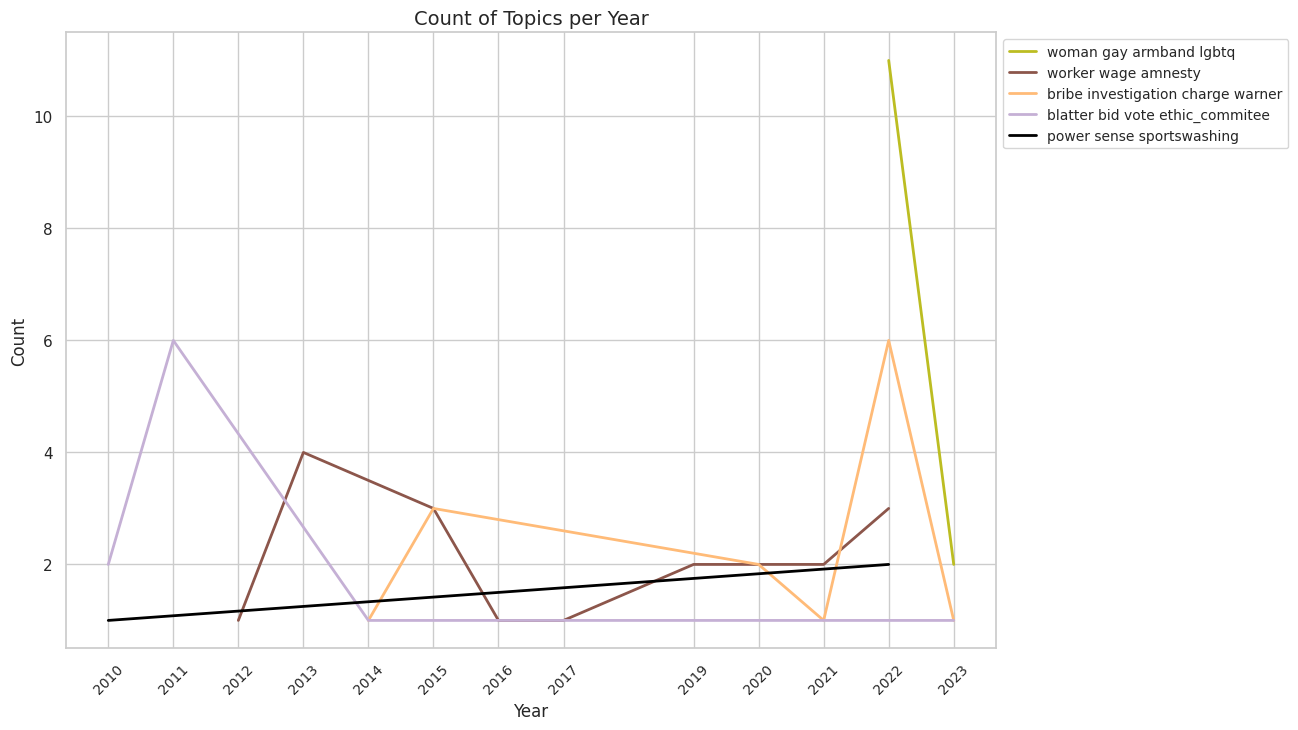

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Year and most_likely_topic_name, then count occurrences
counts = df_aljazerra.groupby(['year', 'most_likely_topic_name']).size().reset_index(name='Count')
source = ['aljazeera']
important_topics = ['woman gay armband lgbtq', 'worker wage amnesty', 'worker wage amnesty',
                    'bribe investigation charge warner', 'blatter bid vote ethic_commitee',
                    'power sense sportswashing']
counts = counts.loc[counts['most_likely_topic_name'].isin(important_topics)]

topic_colors = {
    'woman gay armband lgbtq': '#bcbd22',  # olive
    'worker wage amnesty': '#8c564b',  # brown
    'bribe investigation charge warner': '#ffbb78',  # light orange
    'blatter bid vote ethic_commitee': '#c5b0d5',  # light purple
    'power sense sportswashing': '#000000',  # black
}

# Create a separate line plot for each topic
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
for topic, color in topic_colors.items():
    topic_data = counts[counts['most_likely_topic_name'] == topic]
    plt.plot(topic_data['year'], topic_data['Count'], color=color, linewidth=2)  # Increase line width for better visibility

plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Topics per Year', fontsize=14)
plt.grid(True)

# Set x-axis tick marks and rotate labels for better readability
plt.xticks(counts['year'].unique(), rotation=45, fontsize=10)

# Create a legend outside of the plot
plt.legend(topic_colors.keys(), loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

plt.savefig('plot.pdf', format='pdf', bbox_inches='tight')  # Save the plot with the legend outside
plt.show()



### all Topic Al Jazeera

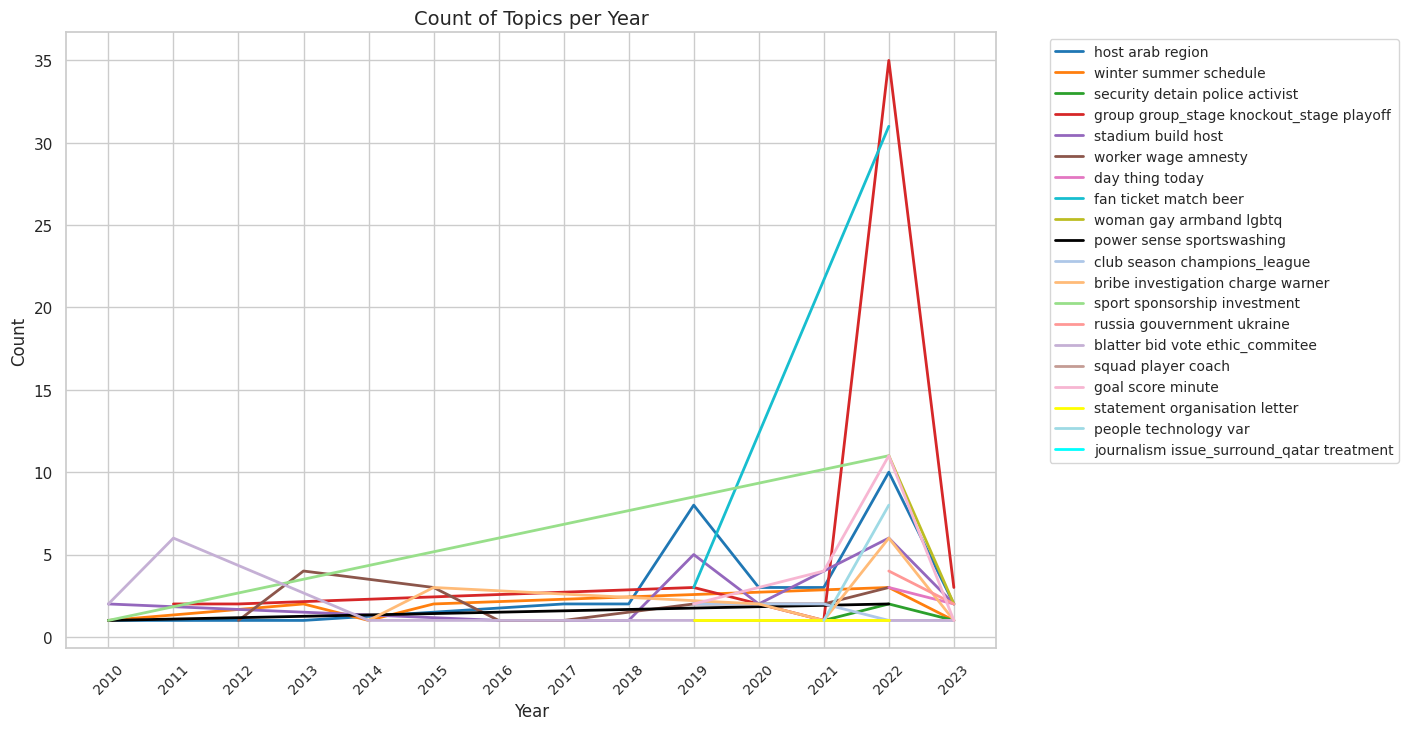

In [23]:

import pandas as pd
import matplotlib.pyplot as plt

# Group by Year and most_likely_topic_name, then count occurrences
counts = df_aljazerra.groupby(['year', 'most_likely_topic_name']).size().reset_index(name='Count')
source = ['aljazeera']
topic_colors = {
    'host arab region': '#1f77b4',  # Blue
    'winter summer schedule': '#ff7f0e',  # Orange
    'security detain police activist': '#2ca02c',  # Green
    'group group_stage knockout_stage playoff': '#d62728',  # Red
    'stadium build host': '#9467bd',  # Purple
    'worker wage amnesty': '#8c564b',  # Brown
    'day thing today': '#e377c2',  # Pink
    'fan ticket match beer': '#17becf',  # Cyan
    'woman gay armband lgbtq': '#bcbd22',  # Olive
    'power sense sportswashing': '#000000',  # Black
    'club season champions_league': '#aec7e8',  # Light Blue
    'bribe investigation charge warner': '#ffbb78',  # Light Orange
    'sport sponsorship investment': '#98df8a',  # Light Green
    'russia gouvernment ukraine': '#ff9896',  # Light Red
    'blatter bid vote ethic_commitee': '#c5b0d5',  # Light Purple
    'squad player coach': '#c49c94',  # Light Brown
    'goal score minute': '#f7b6d2',  # Light Pink
    'statement organisation letter': '#FFFF00',  # Yellow (same as woman gay armband lgbtq)
    'people technology var': '#9edae5',  # Light Cyan
    'journalism issue_surround_qatar treatment': '#00FFFF'  # Light Turquoise
}

# Create a separate line plot for each topic
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
for topic, color in topic_colors.items():
    topic_data = counts[counts['most_likely_topic_name'] == topic]

    plt.plot(topic_data['year'], topic_data['Count'], label=topic, color=color, linewidth=2)  # Increase line width for better visibility

plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Topics per Year', fontsize=14)
plt.grid(True)

# Set x-axis tick marks and rotate labels for better readability
plt.xticks(counts['year'].unique(), rotation=45, fontsize=10)

# Create legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.savefig('plot.pdf', format='pdf', bbox_inches='tight')  # Save plot with legend outside
plt.show()


## all guardian topic 

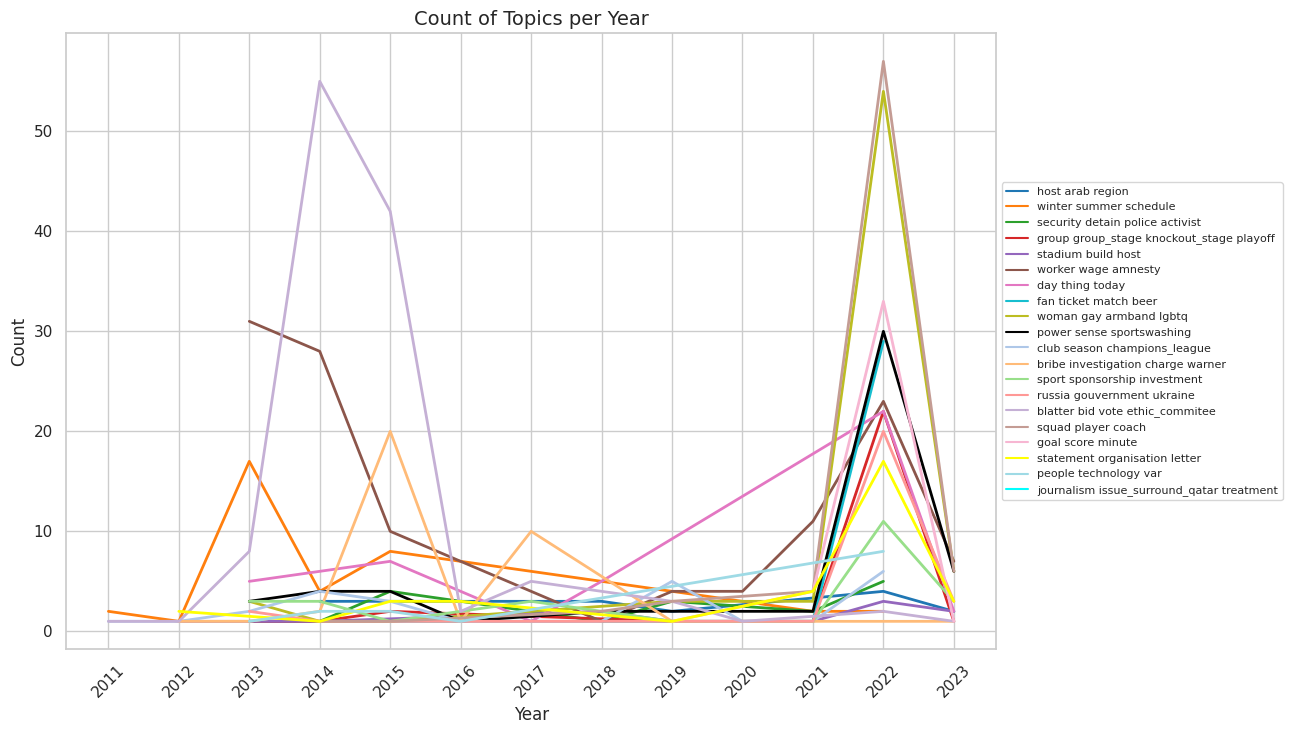

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Year and most_likely_topic_name, then count occurrences
topic_counts = df_guardian.groupby(['year', 'most_likely_topic_name']).size().reset_index(name='Count')

# Define topic colors
topic_colors = {
    'host arab region': '#1f77b4',  # Blue
    'winter summer schedule': '#ff7f0e',  # Orange
    'security detain police activist': '#2ca02c',  # Green
    'group group_stage knockout_stage playoff': '#d62728',  # Red
    'stadium build host': '#9467bd',  # Purple
    'worker wage amnesty': '#8c564b',  # Brown
    'day thing today': '#e377c2',  # Pink
    'fan ticket match beer': '#17becf',  # Cyan
    'woman gay armband lgbtq': '#bcbd22',  # Olive
    'power sense sportswashing': '#000000',  # Black
    'club season champions_league': '#aec7e8',  # Light Blue
    'bribe investigation charge warner': '#ffbb78',  # Light Orange
    'sport sponsorship investment': '#98df8a',  # Light Green
    'russia gouvernment ukraine': '#ff9896',  # Light Red
    'blatter bid vote ethic_commitee': '#c5b0d5',  # Light Purple
    'squad player coach': '#c49c94',  # Light Brown
    'goal score minute': '#f7b6d2',  # Light Pink
    'statement organisation letter': '#FFFF00',  # Yellow (same as woman gay armband lgbtq)
    'people technology var': '#9edae5',  # Light Cyan
    'journalism issue_surround_qatar treatment': '#00FFFF'  # Light Turquoise
}

# Create a separate line plot for each topic
plt.figure(figsize=(12, 8))
for topic, color in topic_colors.items():
    topic_data = topic_counts[topic_counts['most_likely_topic_name'] == topic]
    plt.plot(topic_data['year'], topic_data['Count'], color=color, linewidth=2)

# Set labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Topics per Year', fontsize=14)

# Add gridlines for better readability
plt.grid(True)

# Set x-axis tick marks
plt.xticks(topic_counts['year'].unique(), rotation=45)

# Create a legend outside the plot
legend_handles = [plt.Line2D([0], [0], color=color, label=topic) for topic, color in topic_colors.items()]
plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

# Save plot as PDF
plt.savefig('plot.pdf', format='pdf', bbox_inches='tight')

# Show plot
plt.show()





### restricted guardian topic

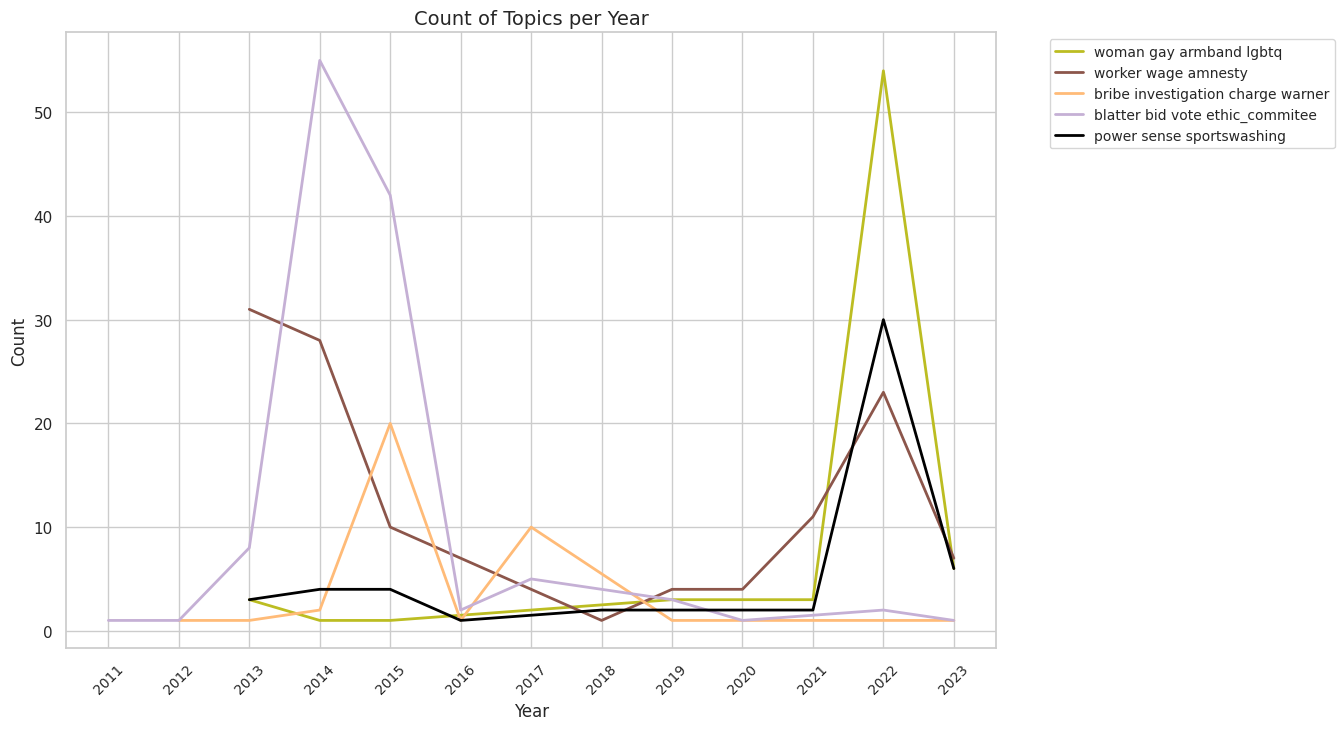

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Year and most_likely_topic_name, then count occurrences
counts = df_guardian.groupby(['year', 'most_likely_topic_name']).size().reset_index(name='Count')
source = ['guardian']

important_topics = ['woman gay armband lgbtq', 'worker wage amnesty', 'worker wage amnesty',
                    'bribe investigation charge warner', 'blatter bid vote ethic_commitee',
                    'power sense sportswashing']
counts = counts.loc[counts['most_likely_topic_name'].isin(important_topics)]

topic_colors = {
    'woman gay armband lgbtq': '#bcbd22',  # olive
    'worker wage amnesty': '#8c564b',  # brown
    'bribe investigation charge warner': '#ffbb78',  # light orange
    'blatter bid vote ethic_commitee': '#c5b0d5',  # light purple
    'power sense sportswashing': '#000000',  # black
}

# Create a separate line plot for each topic
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
for topic, color in topic_colors.items():
    topic_data = counts[counts['most_likely_topic_name'] == topic]
    plt.plot(topic_data['year'], topic_data['Count'], label=topic, color=color, linewidth=2)  # Increase line width for better visibility

plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Topics per Year', fontsize=14)
plt.grid(True)

# Set x-axis tick marks and rotate labels for better readability
plt.xticks(counts['year'].unique(), rotation=45, fontsize=10)

# Move the legend outside of the plot
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('plot.pdf', format='pdf', bbox_inches='tight')  # Adjust bounding box for the legend
plt.show()


### Sentiment Pro Topic

#### Aljazeera

In [26]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming you have already defined 'df_aljazerra' DataFrame and 'sentiments' SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

important_topics = ['woman gay armband lgbtq','worker wage amnesty','bribe investigation charge warner','journalism issue_surround_qatar treatment',
                    'fan ticket match beer','power sense sportswashing']

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['year', 'Positive_title', 'Negative_title', 'Neutral_title', 
                                'Positive_text', 'Negative_text', 'Neutral_text'])

for aljazerra_unique_topic in important_topics:
    df_aljazerra_unique_topic_df = df_aljazerra[df_aljazerra['most_likely_topic_name'] == aljazerra_unique_topic]
    
    # Extract sentiment scores for title
    df_aljazerra_unique_topic_df["Positive_title"] = df_aljazerra_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["pos"])
    df_aljazerra_unique_topic_df["Negative_title"] = df_aljazerra_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["neg"])
    df_aljazerra_unique_topic_df["Neutral_title"] = df_aljazerra_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["neu"])
    
    # Extract sentiment scores for text
    df_aljazerra_unique_topic_df["Positive_text"] = df_aljazerra_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["pos"])
    df_aljazerra_unique_topic_df["Negative_text"] = df_aljazerra_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["neg"])
    df_aljazerra_unique_topic_df["Neutral_text"] = df_aljazerra_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["neu"])
    
    # Append to results DataFrame
    results = pd.concat([results, df_aljazerra_unique_topic_df], ignore_index=True)




/tmp/ipykernel_191233/2767487708.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_191233/2767487708.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_191233/2767487708.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyke

In [27]:
import matplotlib.pyplot as plt

aljazerra_unique_topic_list = []
aljazerra_unique_topic_title_pos_list = []
aljazerra_unique_topic_title_neg_list = []
aljazerra_unique_topic_text_pos_list = []
aljazerra_unique_topic_text_neg_list = []

aljazerra_unique_topics = results['most_likely_topic_name'].unique()

for idx, aljazerra_unique_topic in enumerate(aljazerra_unique_topics):
    aljazerra_unique_topic_list.append(aljazerra_unique_topic)
    df_aljazerra_unique_topic_df = results[results['most_likely_topic_name'] == aljazerra_unique_topic]
    aljazerra_unique_topic_title_pos_list.append(df_aljazerra_unique_topic_df['Positive_title'].mean())
    aljazerra_unique_topic_title_neg_list.append(df_aljazerra_unique_topic_df['Negative_title'].mean())
    aljazerra_unique_topic_text_pos_list.append(df_aljazerra_unique_topic_df['Positive_text'].mean())
    aljazerra_unique_topic_text_neg_list.append(df_aljazerra_unique_topic_df['Negative_text'].mean())
    
# Create DataFrame
df_aljazerra_sentiment_pro_topic = pd.DataFrame({
    'topic': aljazerra_unique_topic_list,
    'title_pos_mean': aljazerra_unique_topic_title_pos_list,
    'title_neg_mean': aljazerra_unique_topic_title_neg_list,
    'text_pos_mean': aljazerra_unique_topic_text_pos_list,
    'text_neg_mean': aljazerra_unique_topic_text_neg_list
})
df_aljazerra_sentiment_pro_topic.head()

topic  title_pos_mean  title_neg_mean  \
0            woman gay armband lgbtq        0.031615        0.060846   
1                worker wage amnesty        0.094526        0.157000   
2  bribe investigation charge warner        0.073643        0.105929   
3              fan ticket match beer        0.113176        0.021441   
4          power sense sportswashing        0.165333        0.000000   

   text_pos_mean  text_neg_mean  
0       0.074308       0.065615  
1       0.078474       0.072632  
2       0.078643       0.070429  
3       0.094618       0.022794  
4       0.125667       0.053667

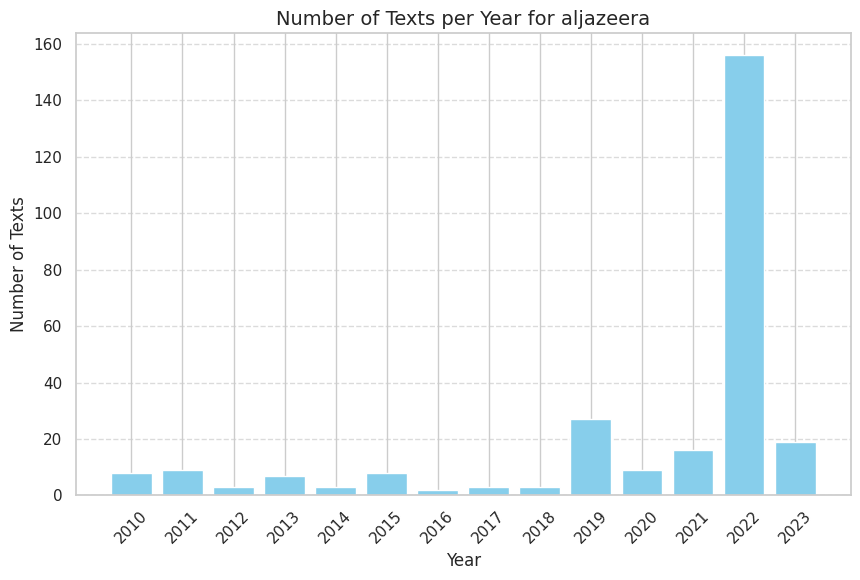

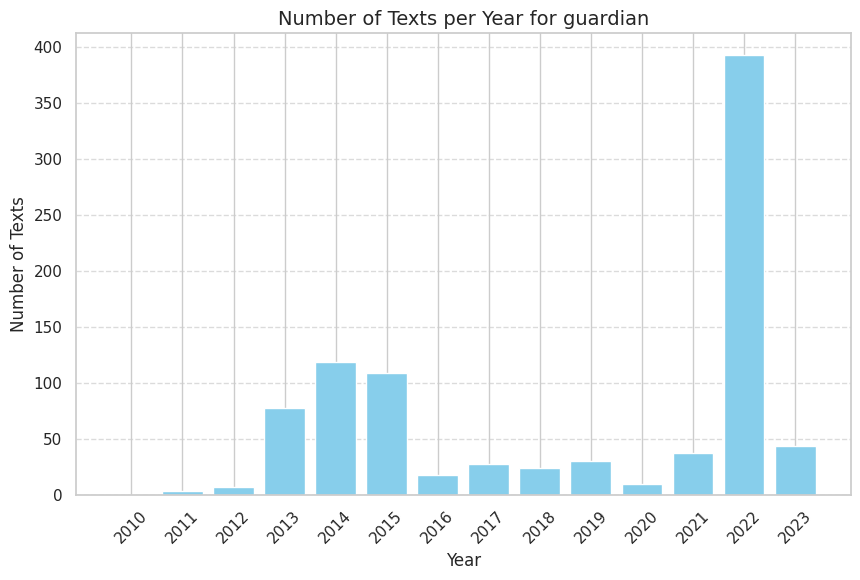

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'source', 'year', and 'text'

# Get the unique sources
sources = df['source'].unique()

# Get all unique years from the DataFrame
all_years = sorted(df['year'].unique())

# Loop through each source
for source in sources:
    # Filter the DataFrame for the current source
    source_df = df[df['source'] == source]
    
    # Group by 'year' and count the number of texts in each year
    text_counts = source_df.groupby('year').size().reindex(all_years, fill_value=0).reset_index(name='Text Count')
    # Plot the bar plot for the current source
    plt.figure(figsize=(10, 6))
    plt.bar(text_counts['year'], text_counts['Text Count'], color='skyblue')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Texts', fontsize=12)
    plt.title(f'Number of Texts per Year for {source}', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for clarity
    
    # Explicitly set the tick locations to ensure all years are displayed
    plt.xticks(text_counts['year'], rotation=45)
    
    plt.show()


In [29]:
for title in all_results.loc[(all_results.most_likely_topic_name == "power sense sportswashing") & (all_results.source == "The Guardian")].head().text:
    print(title)

i
t may be a little early to call this, what with several days of the 
confederations cup
 and an entire world cup to run, but there's a nagging sense that 
sepp blatter
 is somewhat miscast as a brazilian counter-revolutionary.at time of writing, fifa had yet to request covert support from the cia in the form of arms shipments and financial backing. but with 
protests in brazil
 continuing to make the most explicit of links between the money the country's government has spent on fifa tournaments, and the money it hasn't spent on less uplifting things such as healthcare and education, herr blatter finds his usual arsenal increasingly wanting.what is he to do, for instance, about the most prevalent slogan of the ongoing protests: "fifa-standard", which deliberately applies the language of the 
world cup
 bid to the comparatively unfavourable quality of brazilian public services? in any normal circs, of course, blatter would simply sue the placard-waver for unauthorised use of the fifa i